In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
df = pd.read_csv("/content/merged_input.csv")
display(df.head())

,RecordNo,UserID,Date,Location,SessionStart,SessionEnd,StartLocale,EndLocale,DayZone,DayType,...,AddToPantryItems,SavedRecipes,Pantry,DietaryPreferences,Allergy,PreferredRecipes,TabChange,UserAgent,Device,ActivityLog
0,1,anon,2025-09-08,NaN,15:11:26,15:33:18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Mobile,Viewed recipes before widget: ['P11D56R150'];A...
1,2,anon,2025-09-19,NaN,18:34:08,19:02:46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Mozilla/5.0 (Android 11; Mobile; rv:89.0) Geck...,Tablet,Viewed recipes before widget: ['P11D56R150'];A...
2,3,anon,2025-09-08,NaN,13:22:06,13:48:08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Mozilla/5.0 (Android 11; Mobile; rv:89.0) Geck...,Desktop,Viewed recipes before widget: ['P11D56R150'];A...
3,4,user120,2025-09-23,"Fort-de-France,Martinique",01:58:17,02:35:08,09:58 PM,10:35 PM,D,wd,...,NaN,NaN,i430;i570;i650;i377;i1659;i2044;i1578;i1685,NaN,A26;A29;A24;A28;A27,P16D98R83;P7D95R50;P5D96R59;P2D26R107;P5D96R94...,True,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Desktop,Viewed recipes before widget: ['P1D89R157'];Wi...
4,5,user362,2025-09-28,"Belize City,Belize",18:01:20,18:28:50,12:01 PM,12:28 PM,AD,wd,...,NaN,NaN,i1385;i1850;i979;i1846;i1317;i781,NaN,A36;A17;A15;A32;A22;A10,P10D54R99;P12D52R36;P3D15R67;P2D26R115,False,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Tablet,Viewed recipes before widget: ['P1D84R197'];Ta...


User Session Distribution by Hour of Day

   SessionStartHour  Frequency
0               0.0         10
1               1.0         20
2               2.0         13
3               3.0         17
4               4.0          8


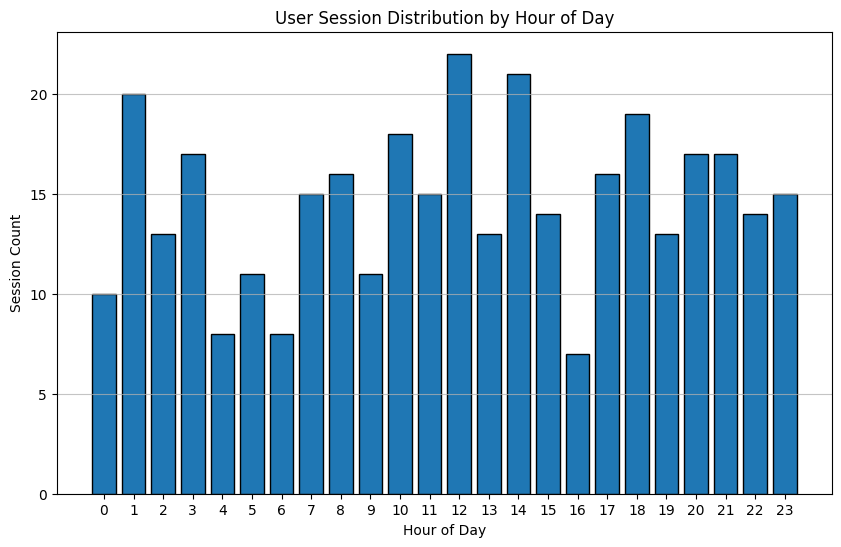

In [4]:
# convert timestamp and extract hour
df['StartLocale'] = pd.to_datetime(df['StartLocale'])
df['SessionStartHour'] = df['StartLocale'].dt.hour

# count sessions per hour
session_hour_freq = df['SessionStartHour'].value_counts().sort_index().reset_index()
session_hour_freq.columns = ['SessionStartHour', 'Frequency']

# show output
print(session_hour_freq.head())

# optional visualization
plt.figure(figsize=(10, 6))
plt.bar(session_hour_freq['SessionStartHour'], session_hour_freq['Frequency'], edgecolor='black')
plt.title('User Session Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Session Count')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()


Session Duration Patterns by Day Type

  DayTypeFull  SessionDuration  SessionDurationMinutes
0     Weekday      1837.918129               30.631969
1     Weekend      1868.100559               31.135009


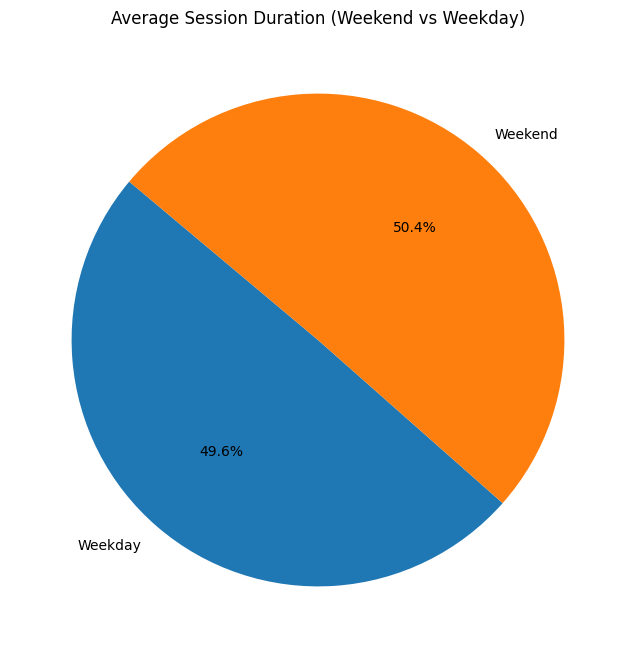

In [5]:
# convert times and handle overnight sessions
df['SessionStart'] = pd.to_datetime(df['SessionStart'], format='%H:%M:%S')
df['SessionEnd'] = pd.to_datetime(df['SessionEnd'], format='%H:%M:%S')
df['SessionDuration'] = (df['SessionEnd'] - df['SessionStart']).dt.total_seconds()
df.loc[df['SessionDuration'] < 0, 'SessionDuration'] += 24 * 3600

# map day type to readable labels
df['DayTypeFull'] = df['DayType'].map({'wd': 'Weekday', 'we': 'Weekend'})

# average duration per day type
avg_duration_daytype = df.groupby('DayTypeFull')['SessionDuration'].mean().reset_index()
avg_duration_daytype['SessionDurationMinutes'] = avg_duration_daytype['SessionDuration'] / 60

# show output
print(avg_duration_daytype)

# optional pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_duration_daytype['SessionDurationMinutes'],
        labels=avg_duration_daytype['DayTypeFull'],
        autopct='%1.1f%%', startangle=140)
plt.title('Average Session Duration (Weekend vs Weekday)')
plt.show()


User Engagement Duration by Geographic Location

                            Location  SessionDurationMinutes
9                  Bucharest,Romania               37.372222
19              Juneau,United States               37.185417
30                     Quito,Ecuador               36.835185
35                    Sofia,Bulgaria               35.633333
41                Yellowknife,Canada               35.446296
37                       Tokyo,Japan               35.316667
34  Santo Domingo,Dominican Republic               33.995833
33              San Juan,Puerto Rico               33.969231
11             Chicago,United States               33.775926
17               Gibraltar,Gibraltar               33.458333


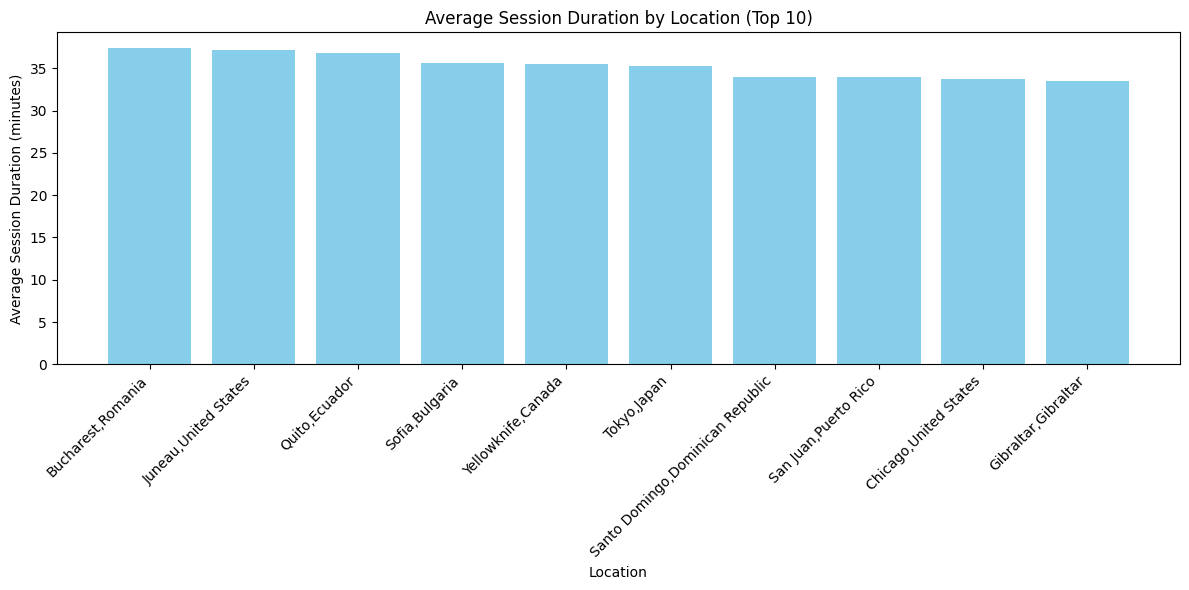

In [6]:
# convert timestamps and handle overnight sessions
df['SessionStart'] = pd.to_datetime(df['SessionStart'], format='%H:%M:%S')
df['SessionEnd'] = pd.to_datetime(df['SessionEnd'], format='%H:%M:%S')
df['SessionDuration'] = (df['SessionEnd'] - df['SessionStart']).dt.total_seconds()
df.loc[df['SessionDuration'] < 0, 'SessionDuration'] += 24 * 3600
df['SessionDurationMinutes'] = df['SessionDuration'] / 60

# average duration per location
location_duration = df.groupby('Location')['SessionDurationMinutes'].mean().reset_index()

# top 10 locations by average duration
top_10_locations = location_duration.sort_values(by='SessionDurationMinutes', ascending=False).head(10)

# show output
print(top_10_locations)

# optional bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_locations['Location'], top_10_locations['SessionDurationMinutes'], color='skyblue')
plt.title('Average Session Duration by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Average Session Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Widget Load Performance by Operating System

        OS  AvgWidgetLoadTime
0  Android           2.642326
1    MacOS           3.015772
2  Windows           2.595714
3      iOS           2.787209


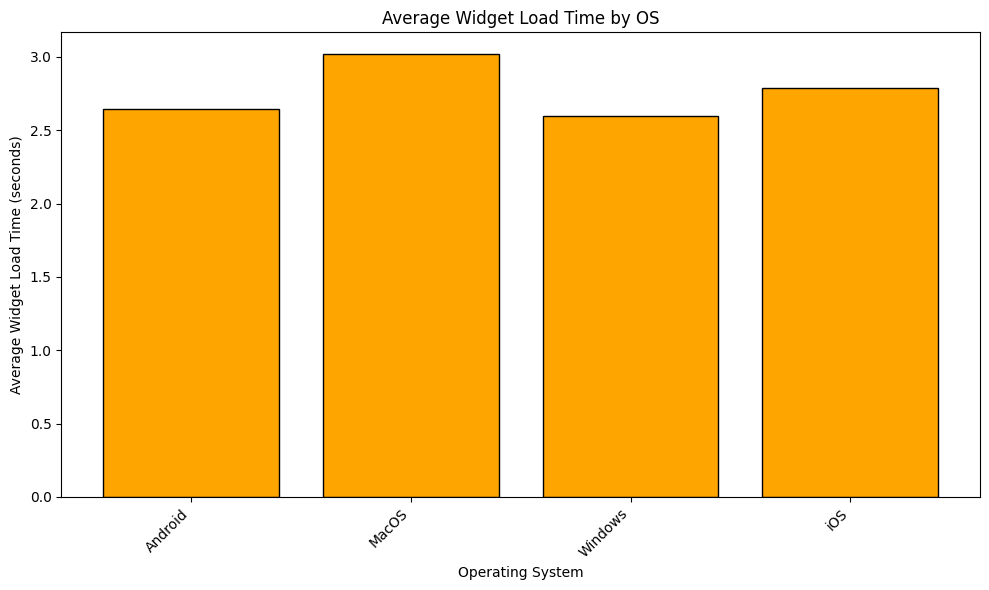

In [9]:
# extract OS from user agent
def extract_os(user_agent):
    if pd.isna(user_agent):
        return 'Unknown'
    os_patterns = [
        ('Windows', r'Windows NT [0-9\.]+'),
        ('MacOS', r'Macintosh; Intel Mac OS X [0-9_]+'),
        ('iOS', r'iPhone|iPad'),
        ('Android', r'Android [0-9\.]+'),
        ('Linux', r'Linux'),
    ]
    for os_name, pattern in os_patterns:
        if re.search(pattern, user_agent):
            return os_name
    return 'Other'

# apply OS extraction
df['OS'] = df['UserAgent'].apply(extract_os)

# average widget load time per OS
avg_widget_load_os = df.groupby('OS')['WidgetLoadTime'].mean().reset_index()
avg_widget_load_os.rename(columns={'WidgetLoadTime': 'AvgWidgetLoadTime'}, inplace=True)

# show output
print(avg_widget_load_os)

# optional bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_widget_load_os['OS'], avg_widget_load_os['AvgWidgetLoadTime'], color='orange', edgecolor='black')
plt.title('Average Widget Load Time by OS')
plt.xlabel('Operating System')
plt.ylabel('Average Widget Load Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Device Usage Patterns Across Top Locations

Device                            Desktop     Mobile     Tablet
Location                                                       
Basseterre,St. Kitts and Nevis  23.076923  30.769231  46.153846
Belize City,Belize              33.333333  33.333333  33.333333
Brussels,Belgium                 9.090909  72.727273  18.181818
Chicago,United States           22.222222  22.222222  55.555556
Denver,United States            30.769231  23.076923  46.153846
Dhaka,Bangladesh                30.000000  30.000000  40.000000
Hanoi,Vietnam                   53.333333  26.666667  20.000000
La Paz,Bolivia                  21.428571  32.142857  46.428571
London,United Kingdom           53.846154  23.076923  23.076923
Manaus,Brazil                   33.333333  22.222222  44.444444
Moscow,Russia                   33.333333  44.444444  22.222222
Murmansk,Russia                 44.444444   0.000000  55.555556
San Juan,Puerto Rico            38.461538  15.384615  46.153846
Tokyo,Japan                     10.00000

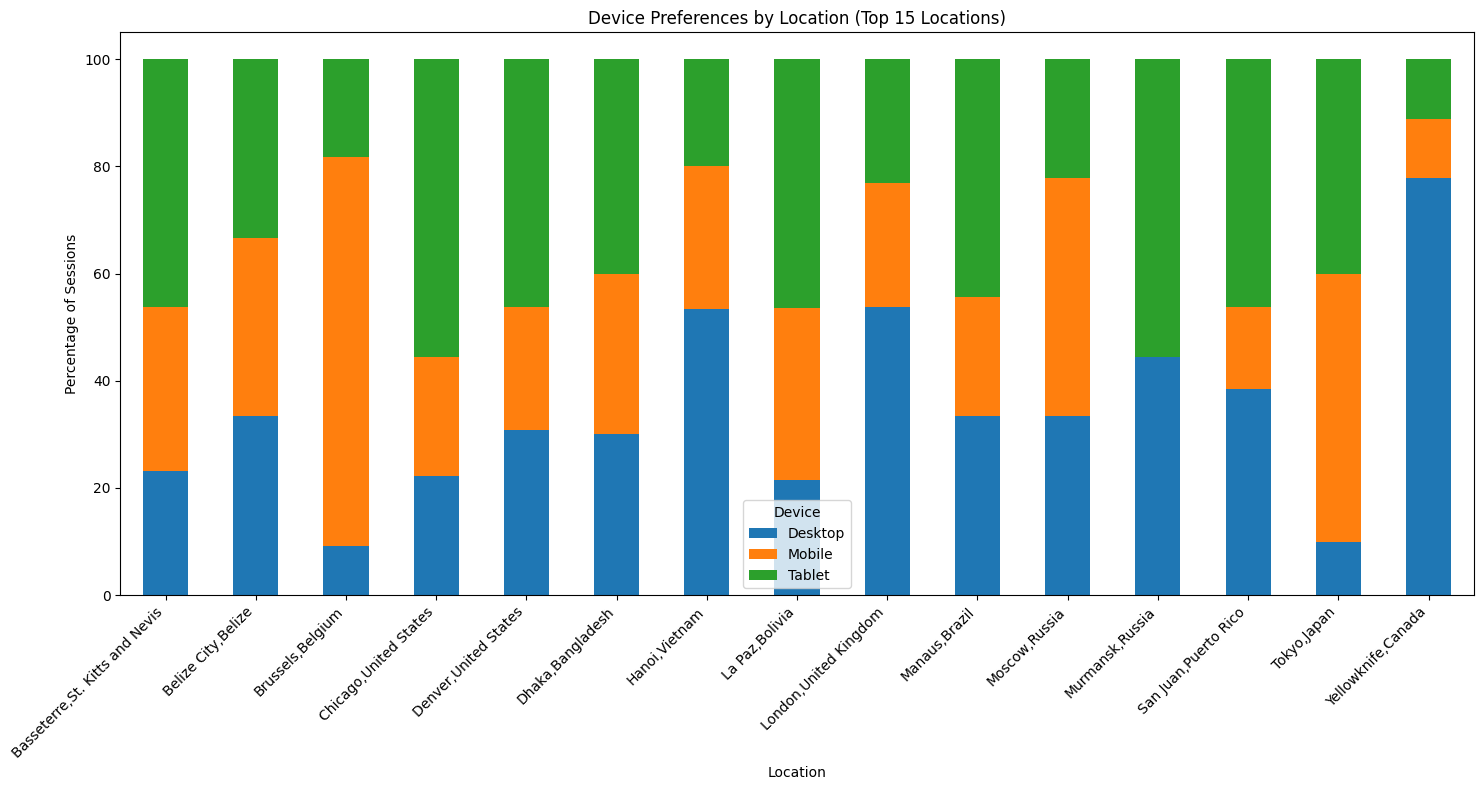

In [10]:
# count sessions per location and device
location_device_counts = df.groupby(['Location', 'Device']).size().reset_index(name='Count')

# find top 15 locations by total sessions
top_locations = df['Location'].value_counts().head(15).index

# keep only top locations
location_device_counts_top = location_device_counts[location_device_counts['Location'].isin(top_locations)]

# pivot and compute percentage share per location
location_device_pivot = location_device_counts_top.pivot_table(index='Location', columns='Device', values='Count', fill_value=0)
location_device_percentage = location_device_pivot.apply(lambda x: x / x.sum() * 100, axis=1)

# show output
print(location_device_percentage)

# optional stacked bar chart
location_device_percentage.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Device Preferences by Location (Top 15 Locations)')
plt.xlabel('Location')
plt.ylabel('Percentage of Sessions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Device')
plt.tight_layout()
plt.show()


Conversion Rate Trends Across Month Segments and Devices

✅ Conversion Rate by Month Part and Device:
  monthpart   device  TotalSessions  ConvertedSessions  ConversionRate
0       Beg  Desktop             50                 14       28.000000
1       Beg   Mobile             59                 18       30.508475
2       Beg   Tablet             58                 23       39.655172
6       Mid  Desktop             68                 23       33.823529
7       Mid   Mobile             49                 15       30.612245
8       Mid   Tablet             61                 22       36.065574
3       End  Desktop             54                 17       31.481481
4       End   Mobile             51                 20       39.215686
5       End   Tablet             50                 15       30.000000


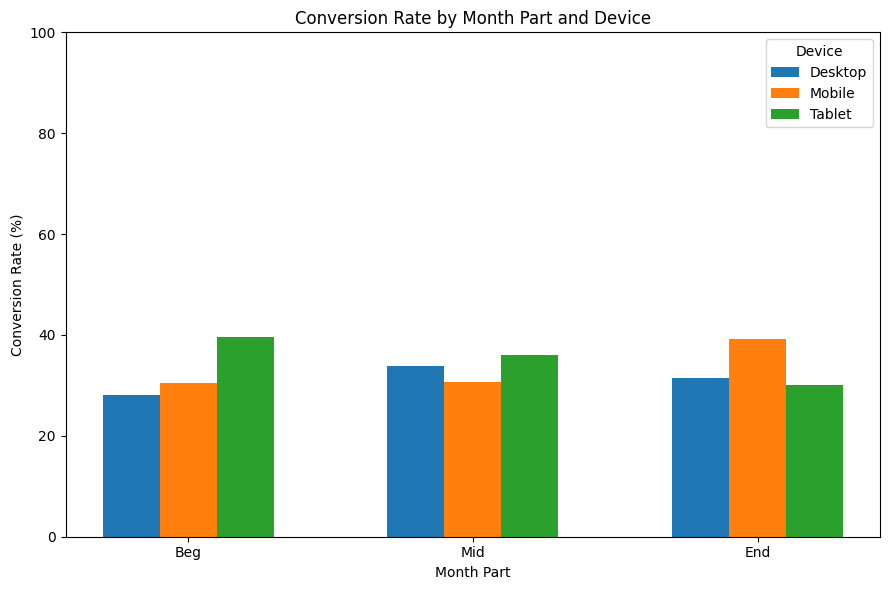

In [11]:
# ensure column names are lowercase
df.columns = df.columns.str.strip().str.lower()

# check required columns
required_cols = ['date', 'addtocart', 'recipesaved', 'device']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: '{col}' in dataset.")

# convert date and get month part
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

def get_month_part(day):
    if 1 <= day <= 10:
        return 'Beg'
    elif 11 <= day <= 20:
        return 'Mid'
    else:
        return 'End'

df['monthpart'] = df['date'].dt.day.apply(get_month_part)

# mark conversions
df['converted'] = (df['addtocart'] == True) | (df['recipesaved'] == True)

# total and converted sessions
group_cols = ['monthpart', 'device']
total_sessions = df.groupby(group_cols).size().reset_index(name='TotalSessions')
converted_sessions = df[df['converted'] == True].groupby(group_cols).size().reset_index(name='ConvertedSessions')

# merge and compute conversion rate
conversion_rate_df = pd.merge(total_sessions, converted_sessions, on=group_cols, how='left')
conversion_rate_df['ConvertedSessions'] = conversion_rate_df['ConvertedSessions'].fillna(0)
conversion_rate_df['ConversionRate'] = (conversion_rate_df['ConvertedSessions'] / conversion_rate_df['TotalSessions']) * 100

# order by month part
month_order = ['Beg', 'Mid', 'End']
conversion_rate_df['monthpart'] = pd.Categorical(conversion_rate_df['monthpart'], categories=month_order, ordered=True)
conversion_rate_df = conversion_rate_df.sort_values(['monthpart', 'device'])

# show output
print("Conversion Rate by Month Part and Device:")
print(conversion_rate_df.head(10))

# optional grouped bar chart
plt.figure(figsize=(9, 6))
devices = conversion_rate_df['device'].unique()
x = range(len(month_order))
bar_width = 0.2

for i, device in enumerate(devices):
    subset = conversion_rate_df[conversion_rate_df['device'] == device]
    plt.bar(
        [p + i * bar_width for p in x],
        subset['ConversionRate'],
        width=bar_width,
        label=device
    )

plt.title('Conversion Rate by Month Part and Device')
plt.xlabel('Month Part')
plt.ylabel('Conversion Rate (%)')
plt.xticks([p + bar_width for p in x], month_order)
plt.ylim(0, 100)
plt.legend(title="Device")
plt.tight_layout()
plt.show()


Tab Switching Patterns Across Devices

TabChange      False      True 
Device                         
Desktop    74.418605  25.581395
Mobile     77.987421  22.012579
Tablet     72.189349  27.810651


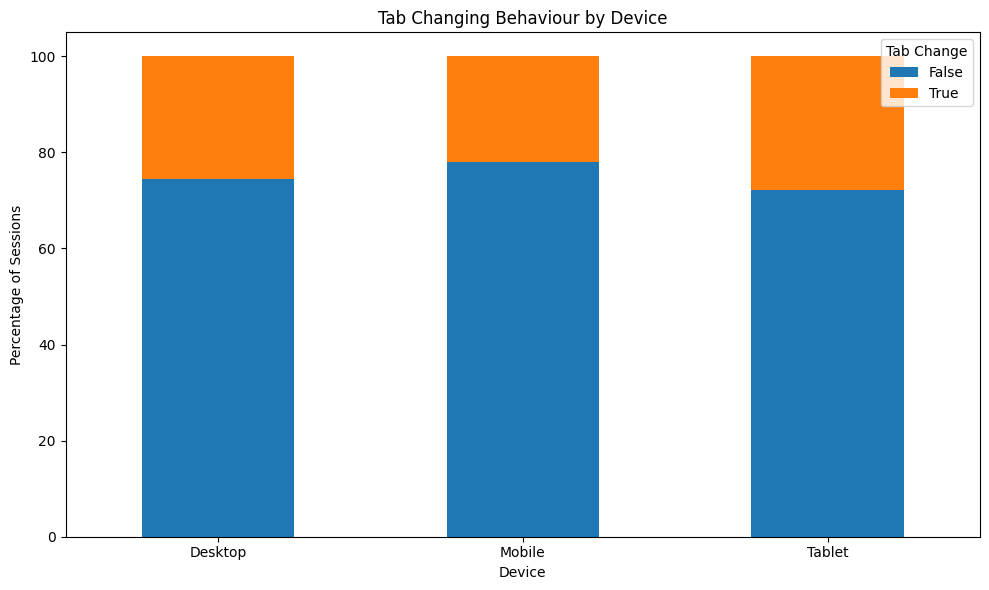

In [15]:
# percentage of TabChange (True/False) by Device
tab_change_by_device = df.groupby('Device')['TabChange'].value_counts(normalize=True).unstack().fillna(0) * 100

# show result
print(tab_change_by_device)

# stacked bar chart
tab_change_by_device.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tab Changing Behaviour by Device')
plt.xlabel('Device')
plt.ylabel('Percentage of Sessions')
plt.xticks(rotation=0)
plt.legend(title='Tab Change')
plt.tight_layout()
plt.show()


User Pantry Size Distribution

Number of users with a pantry: 49
    UserID  PantrySize
1   user10         5.0
2  user120         8.0
3  user124        10.0
4  user125         5.0
5   user13         8.0
   AveragePantrySize  NumberOfUsers
0                  3              4
1                  4              6
2                  5              6
3                  6              3
4                  7              3
5                  8              9
6                  9              7
7                 10             11


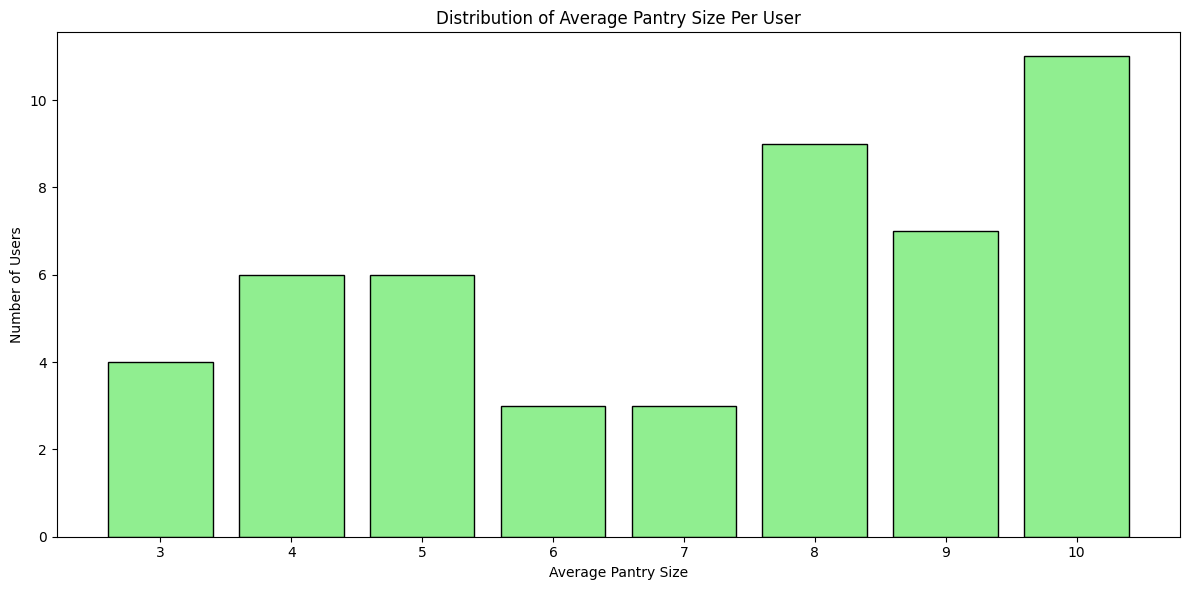

In [20]:
# compute pantry size per row
def calculate_pantry_size(pantry_items):
    if pd.isna(pantry_items):
        return 0
    return len(pantry_items.split(';'))

df['PantrySize'] = df['Pantry'].apply(calculate_pantry_size)

# avg pantry size per user
average_pantry_size_per_user = df.groupby('UserID')['PantrySize'].mean().reset_index()
average_pantry_size_per_user = average_pantry_size_per_user[average_pantry_size_per_user['PantrySize'] > 0]

print(f"Number of users with a pantry: {len(average_pantry_size_per_user)}")
print(average_pantry_size_per_user.head())

# summarize counts by rounded pantry size
average_pantry_size_per_user['PantrySizeRounded'] = (
    average_pantry_size_per_user['PantrySize'].round().astype(int)
)

# create frequency table manually
pantry_summary = (
    average_pantry_size_per_user.groupby('PantrySizeRounded')
    .size()
    .reset_index(name='NumberOfUsers')
    .rename(columns={'PantrySizeRounded': 'AveragePantrySize'})
    .sort_values('AveragePantrySize')
)

print(pantry_summary)

# bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    pantry_summary['AveragePantrySize'],
    pantry_summary['NumberOfUsers'],
    color='lightgreen',
    edgecolor='black'
)
plt.title('Distribution of Average Pantry Size Per User')
plt.xlabel('Average Pantry Size')
plt.ylabel('Number of Users')
plt.xticks(pantry_summary['AveragePantrySize'])
plt.tight_layout()
plt.show()


User Composition: Anonymous vs Registered

     UserType  Percentage
0  Registered        70.0
1   Anonymous        30.0


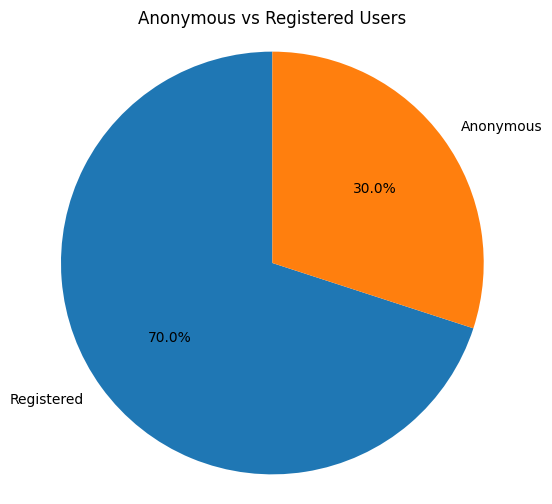

In [21]:
# classify users as anonymous or registered
df['UserType'] = df['UserID'].apply(
    lambda x: 'Anonymous' if str(x).lower().startswith('anon') else 'Registered'
)

# percentage of each type
user_type_counts = df['UserType'].value_counts(normalize=True) * 100

# tidy dataframe
user_type_df = pd.DataFrame({
    'UserType': user_type_counts.index,
    'Percentage': user_type_counts.values
})

# show summary
print(user_type_df)

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    user_type_df['Percentage'],
    labels=user_type_df['UserType'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Anonymous vs Registered Users')
plt.axis('equal')
plt.show()


Recipe Exploration Depth per Session

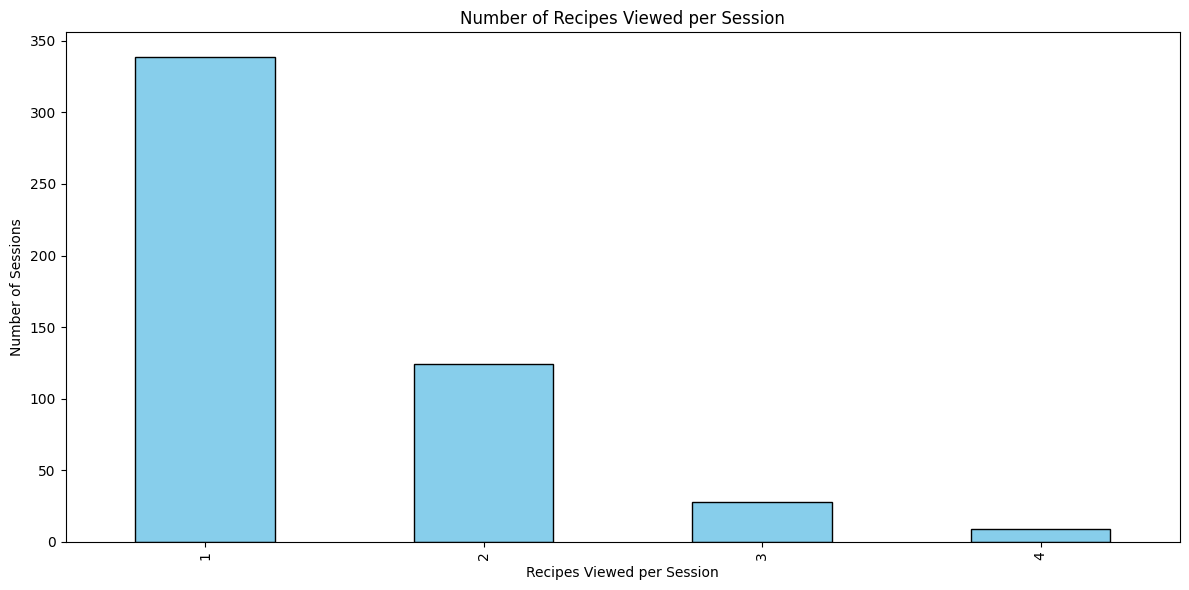

In [24]:
recipes_viewed_summary = df['RecipesViewedPerSession'].value_counts().sort_index()
recipes_viewed_summary.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Number of Recipes Viewed per Session')
plt.xlabel('Recipes Viewed per Session')
plt.ylabel('Number of Sessions')
plt.tight_layout()
plt.show()


Ingredient Purchase Patterns by Time of Day

/tmp/ipython-input-3452708153.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['StartLocale'] = pd.to_datetime(df['StartLocale'], errors='coerce')


    SessionStartHour  AddedToCartCount
0                0.0          0.800000
1                1.0          0.700000
2                2.0          0.769231
3                3.0          1.058824
4                4.0          0.750000
5                5.0          1.090909
6                6.0          0.000000
7                7.0          1.200000
8                8.0          1.062500
9                9.0          0.909091
10              10.0          0.777778
11              11.0          0.933333
12              12.0          0.954545
13              13.0          0.307692
14              14.0          0.380952
15              15.0          0.428571
16              16.0          0.142857
17              17.0          0.687500
18              18.0          1.368421
19              19.0          0.384615
20              20.0          0.588235
21              21.0          0.647059
22              22.0          0.357143
23              23.0          0.533333


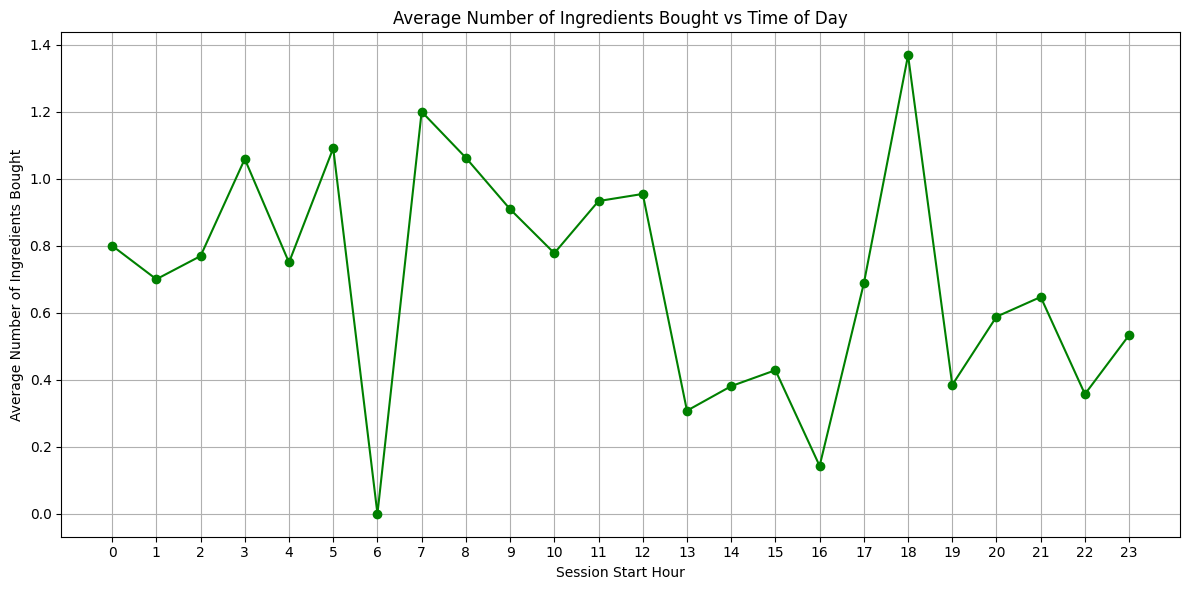

In [25]:
def count_added_to_cart_items(items):
    if pd.isna(items) or str(items).strip() == '':
        return 0
    return len([i.strip() for i in items.split(';') if i.strip() != ''])

df['AddedToCartCount'] = df['AddedToCartItems'].apply(count_added_to_cart_items)

# extract hour if not already present
if 'SessionStartHour' not in df.columns:
    df['StartLocale'] = pd.to_datetime(df['StartLocale'], errors='coerce')
    df['SessionStartHour'] = df['StartLocale'].dt.hour

# average ingredients bought by session hour
average_added_to_cart_by_hour = (
    df.groupby('SessionStartHour')['AddedToCartCount']
    .mean()
    .reset_index()
    .sort_values('SessionStartHour')
)

print(average_added_to_cart_by_hour)

# simple line plot
plt.figure(figsize=(12, 6))
plt.plot(
    average_added_to_cart_by_hour['SessionStartHour'],
    average_added_to_cart_by_hour['AddedToCartCount'],
    marker='o',
    color='green'
)
plt.title('Average Number of Ingredients Bought vs Time of Day')
plt.xlabel('Session Start Hour')
plt.ylabel('Average Number of Ingredients Bought')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Ingredient Purchase Patterns Across Top Locations

                 Location  AddedToCartCount
37            Tokyo,Japan          1.800000
23    Longyearbyen,Norway          1.500000
3         Baku,Azerbaijan          1.500000
40        Winnipeg,Canada          1.400000
39          Tripoli,Libya          1.375000
26          Manaus,Brazil          1.333333
32             Rome,Italy          1.285714
11  Chicago,United States          1.222222
35         Sofia,Bulgaria          1.200000
19   Juneau,United States          1.125000


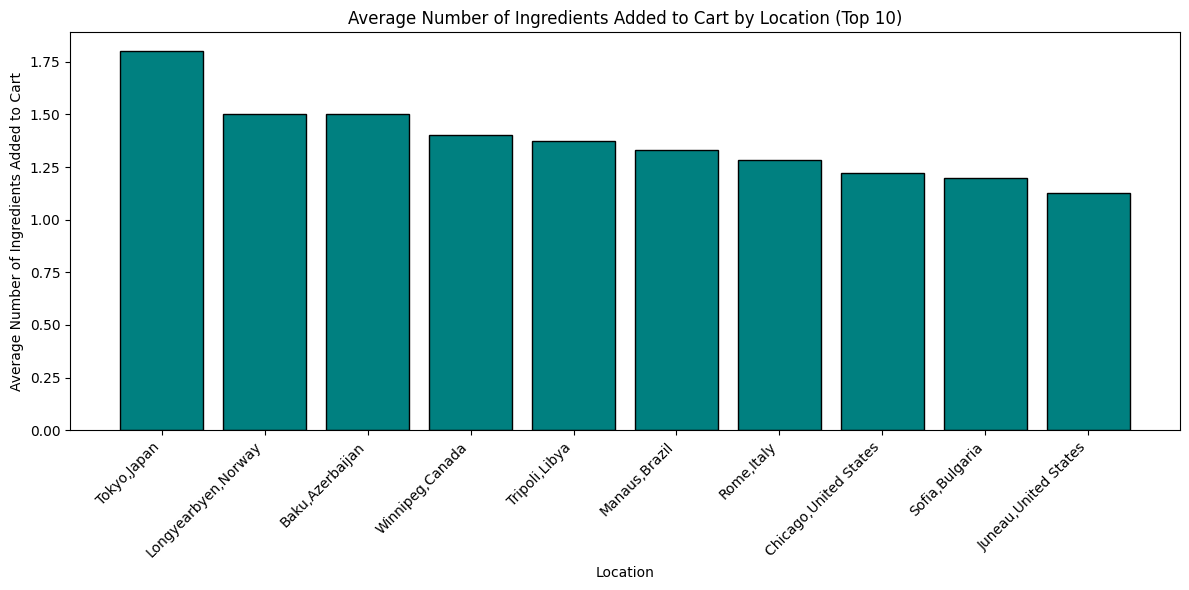

In [27]:
# count items in AddedToCartItems
def count_added_to_cart_items(items):
    if pd.isna(items) or str(items).strip() == '':
        return 0
    return len([i.strip() for i in items.split(';') if i.strip() != ''])

# apply function
df['AddedToCartCount'] = df['AddedToCartItems'].apply(count_added_to_cart_items)

# average number of ingredients added to cart by location
average_added_to_cart_by_location = (
    df.groupby('Location')['AddedToCartCount']
    .mean()
    .reset_index()
)

# top 10 locations
top_10_locations_added_to_cart = (
    average_added_to_cart_by_location
    .sort_values(by='AddedToCartCount', ascending=False)
    .head(10)
)

print(top_10_locations_added_to_cart)

# simple bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    top_10_locations_added_to_cart['Location'],
    top_10_locations_added_to_cart['AddedToCartCount'],
    color='teal',
    edgecolor='black'
)
plt.title('Average Number of Ingredients Added to Cart by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Average Number of Ingredients Added to Cart')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top User Locations by Partner

   PartnerID               Location  SessionCount
0   partner1         La Paz,Bolivia             8
1  partner11         La Paz,Bolivia             6
2  partner16         La Paz,Bolivia             7
3   partner4  Chicago,United States             4
4   partner9   Tegucigalpa,Honduras             4


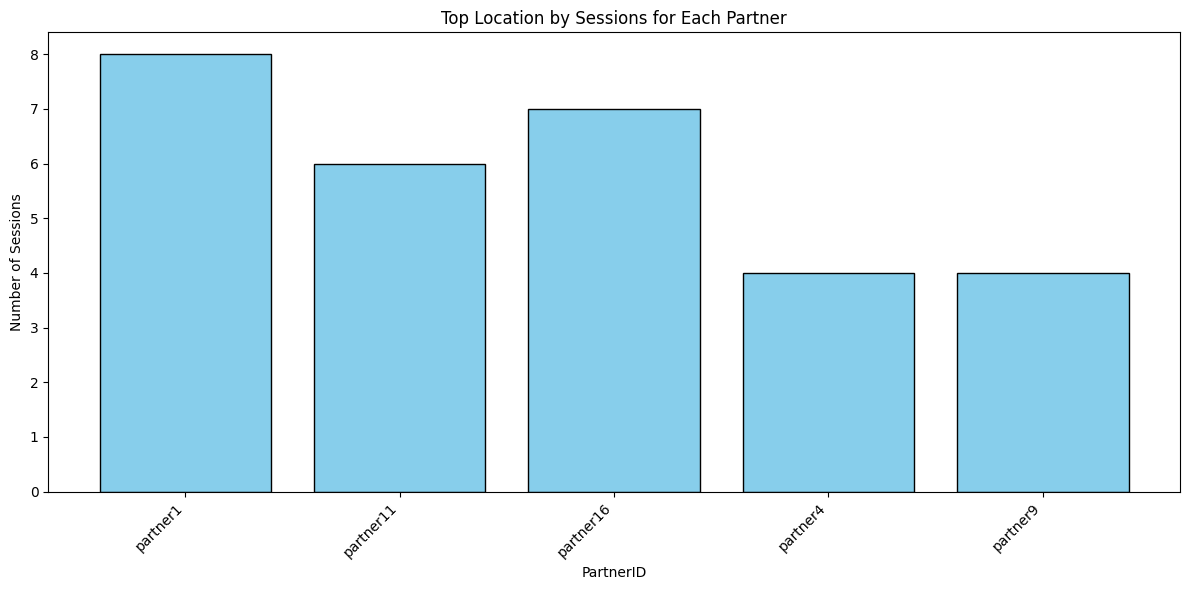

In [28]:
# count sessions per PartnerID and Location
partner_location_counts = (
    df.groupby(['PartnerID', 'Location'])
    .size()
    .reset_index(name='SessionCount')
)

# find top location per partner
idx = partner_location_counts.groupby('PartnerID')['SessionCount'].idxmax()
top_location_per_partner = partner_location_counts.loc[idx].reset_index(drop=True)

print(top_location_per_partner)

# simple bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    top_location_per_partner['PartnerID'],
    top_location_per_partner['SessionCount'],
    color='skyblue',
    edgecolor='black'
)
plt.xticks(rotation=45, ha='right')
plt.title('Top Location by Sessions for Each Partner')
plt.xlabel('PartnerID')
plt.ylabel('Number of Sessions')
plt.tight_layout()
plt.show()


Session Duration Patterns Across Devices

/tmp/ipython-input-2053327573.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SessionStart'] = pd.to_datetime(df['SessionStart'])
/tmp/ipython-input-2053327573.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SessionEnd'] = pd.to_datetime(df['SessionEnd'])


    Device  SessionDuration
0  Desktop        30.690936
1   Mobile        30.531224
2   Tablet        30.825673


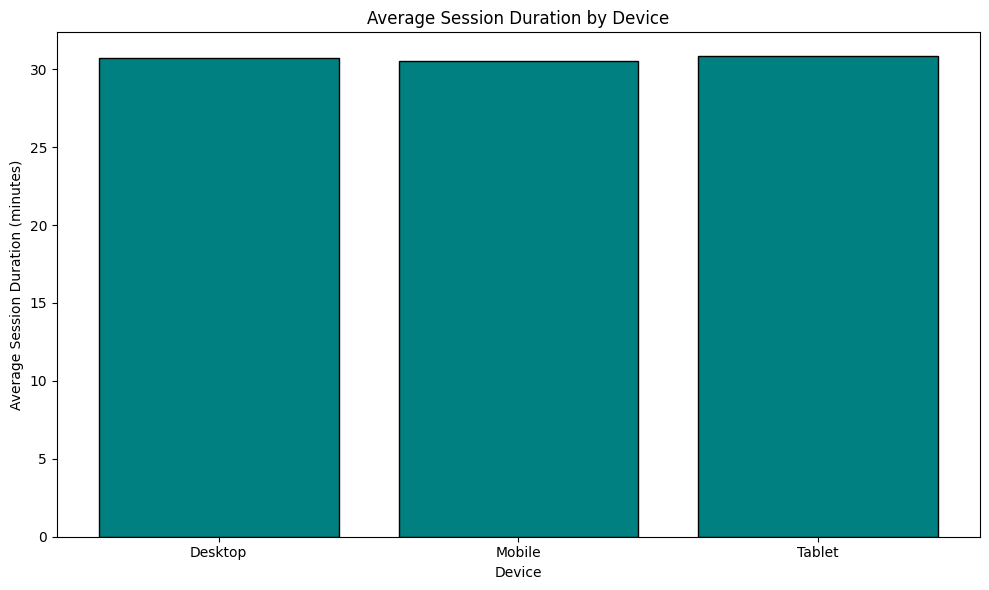

In [31]:
# convert session times to datetime
df['SessionStart'] = pd.to_datetime(df['SessionStart'])
df['SessionEnd'] = pd.to_datetime(df['SessionEnd'])

# calculate session duration (in minutes)
df['SessionDuration'] = (df['SessionEnd'] - df['SessionStart']).dt.total_seconds() / 60
df = df[df['SessionDuration'] >= 0]  # remove negatives

# average session duration by device
avg_duration = df.groupby('Device')['SessionDuration'].mean().reset_index()
print(avg_duration)

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_duration['Device'], avg_duration['SessionDuration'], color='teal', edgecolor='black')
plt.title('Average Session Duration by Device')
plt.xlabel('Device')
plt.ylabel('Average Session Duration (minutes)')
plt.tight_layout()
plt.show()


Ingredient Purchase Patterns Across Month Segments

  monthpart  addedtocartcount
0       beg          2.947368
1       mid          3.044444
2       end          3.166667


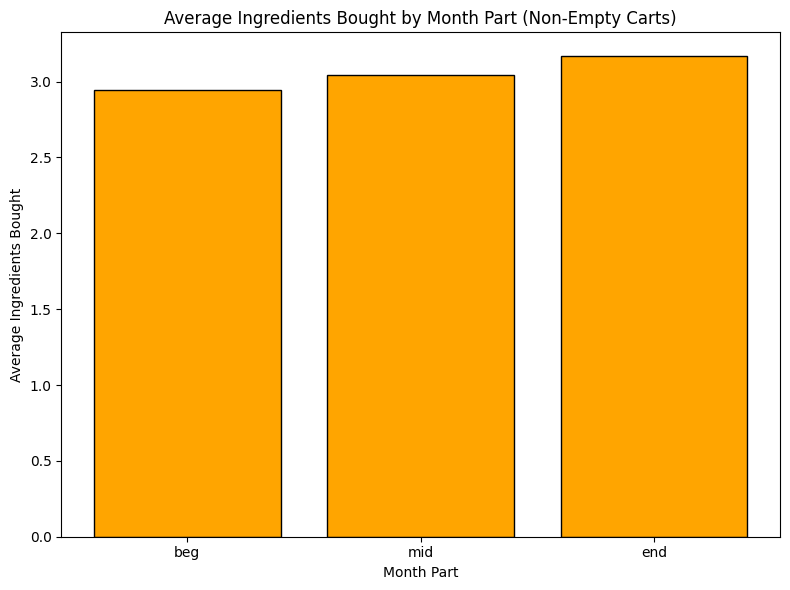

In [32]:
df.columns = df.columns.str.strip().str.lower()

def count_added_to_cart_items(items):
    if pd.isna(items) or str(items).strip() == '':
        return 0
    return len([i.strip() for i in str(items).split(';') if i.strip() != ''])

df['addedtocartcount'] = df['addedtocartitems'].apply(count_added_to_cart_items)
df_nonempty = df[df['addedtocartcount'] > 0].copy()

df_nonempty['date'] = pd.to_datetime(df_nonempty['date'], errors='coerce')
df_nonempty = df_nonempty.dropna(subset=['date'])

def month_part(day):
    if day <= 10: return 'beg'
    elif day <= 20: return 'mid'
    return 'end'

df_nonempty['monthpart'] = df_nonempty['date'].dt.day.apply(month_part)

avg_cart = (
    df_nonempty.groupby('monthpart')['addedtocartcount']
    .mean()
    .reindex(['beg', 'mid', 'end'])
    .reset_index()
)

print(avg_cart)

plt.figure(figsize=(8, 6))
plt.bar(avg_cart['monthpart'], avg_cart['addedtocartcount'], color='orange', edgecolor='black')
plt.title('Average Ingredients Bought by Month Part (Non-Empty Carts)')
plt.xlabel('Month Part')
plt.ylabel('Average Ingredients Bought')
plt.tight_layout()
plt.show()


Device Usage Distribution Across Partners        


Device     Desktop  Mobile  Tablet
PartnerID                         
partner1        32      36      41
partner11       36      29      35
partner16       40      33      32
partner4        29      31      34
partner9        35      30      27


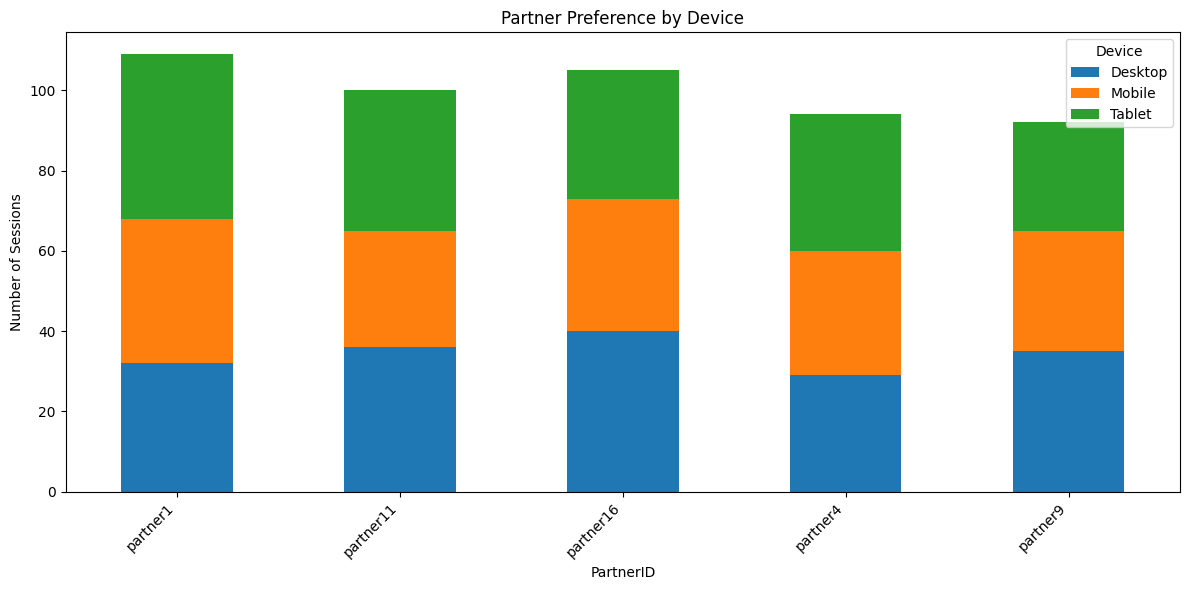

In [33]:
partner_device = (
    df.groupby(['PartnerID', 'Device'])
    .size()
    .unstack(fill_value=0)
)

print(partner_device)

with pd.ExcelWriter('/content/merged_input.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as w:
    partner_device.to_excel(w, sheet_name='Lokeshvar_Partner_Device')

partner_device.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Partner Preference by Device')
plt.xlabel('PartnerID')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Device Usage Patterns Across Different Times of Day

/tmp/ipython-input-2944475755.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['SessionStart'] = pd.to_datetime(df['SessionStart'], errors='coerce')


Device              Desktop     Mobile     Tablet
SessionStartHour                                 
0                 38.095238  38.095238  23.809524
1                 33.333333  25.925926  40.740741
2                 33.333333  23.809524  42.857143
3                 25.000000  18.750000  56.250000
4                 29.411765  52.941176  17.647059


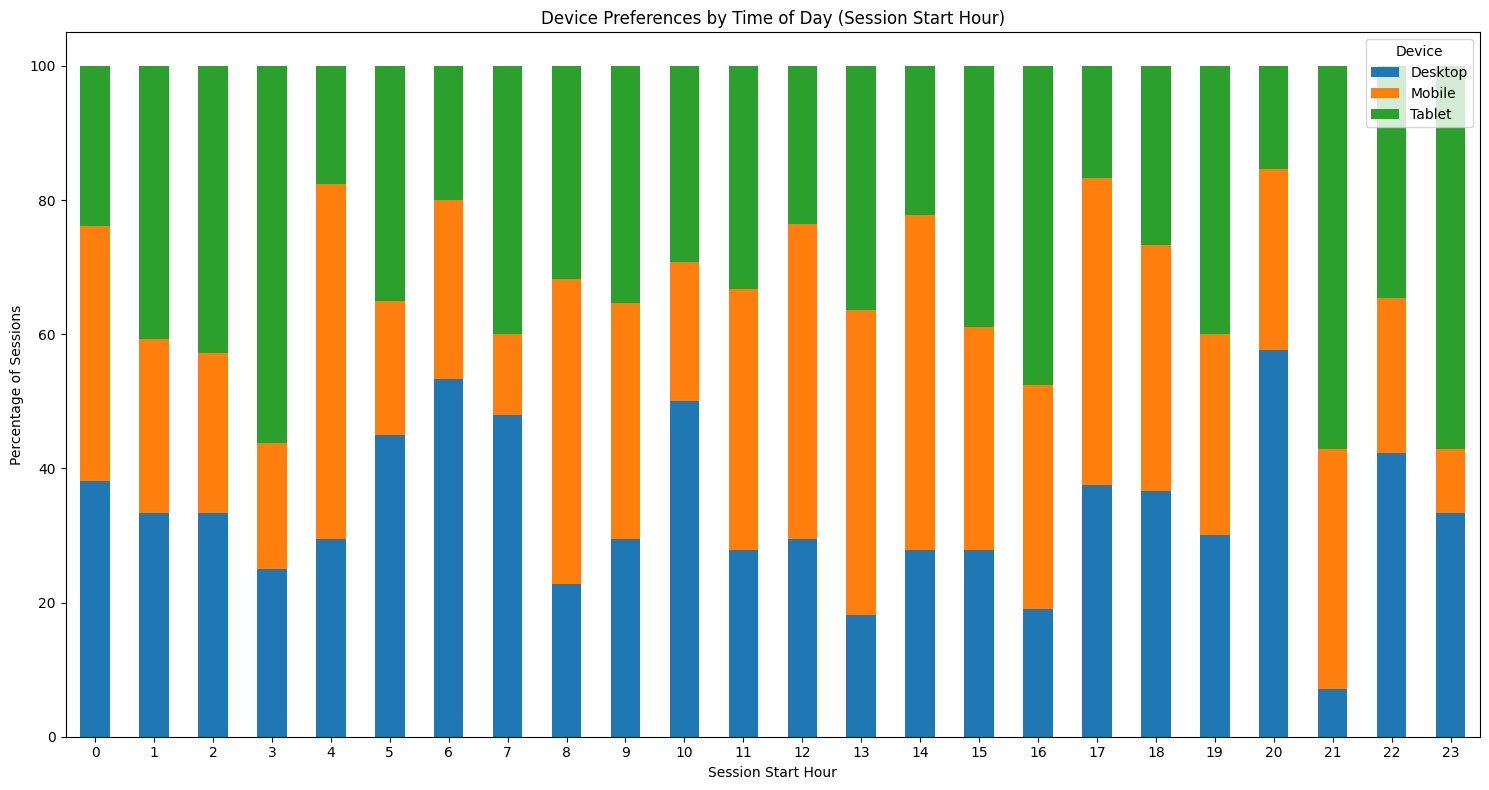

In [34]:
# --------------------------
# Metric: Device Preferences by Time of Day
# --------------------------

# Ensure SessionStartHour exists (if not, extract from SessionStart)
if 'SessionStartHour' not in df.columns:
    df['SessionStart'] = pd.to_datetime(df['SessionStart'], errors='coerce')
    df = df.dropna(subset=['SessionStart'])
    df['SessionStartHour'] = df['SessionStart'].dt.hour

# Replace missing devices (if any)
df['Device'] = df['Device'].fillna('Unknown')

# Count sessions per SessionStartHour and Device
time_device_counts = df.groupby(['SessionStartHour', 'Device']).size().reset_index(name='Count')

# Pivot for visualization
time_device_pivot = time_device_counts.pivot_table(index='SessionStartHour', columns='Device', values='Count', fill_value=0)

# Calculate percentages for stacked visualization
time_device_percentage = time_device_pivot.apply(lambda x: x / x.sum() * 100, axis=1).sort_index()

print(time_device_percentage.head())

# --------------------------
# Visualization: Stacked Bar Chart
# --------------------------
time_device_percentage.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Device Preferences by Time of Day (Session Start Hour)')
plt.xlabel('Session Start Hour')
plt.ylabel('Percentage of Sessions')
plt.xticks(rotation=0)
plt.legend(title='Device')
plt.tight_layout()
plt.show()


Chat-First Engagement Rate  

✅ Summary of Chat Interaction After Widget Opened:
                                Metric  SessionsWithChatFirst  \
0  Chat Interaction First After Widget                     63   

   TotalWidgetSessions  Percentage  
0                  184    34.23913  


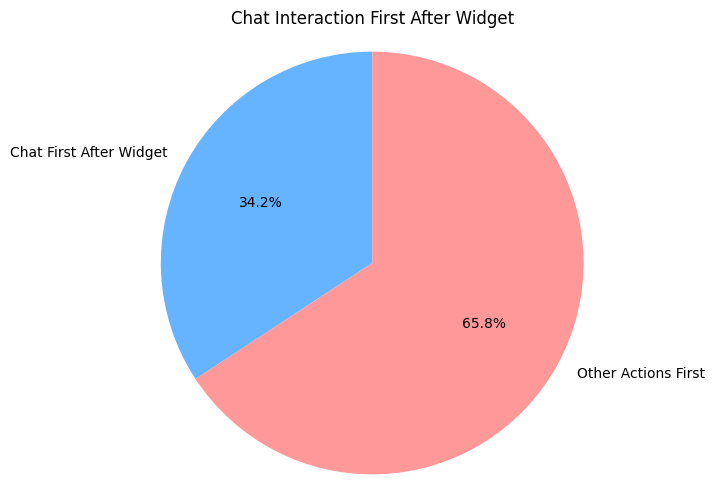

In [35]:
# -----------------------------
# Metric: Chat Interaction First After Widget
# -----------------------------

# Function to identify if chat was first action after "Widget opened"
def chat_first_after_widget(activity_log):
    if pd.isna(activity_log):
        return 0
    actions = [act.strip() for act in str(activity_log).split(';') if act.strip()]
    try:
        # Find index of 'widget opened'
        widget_index = next(i for i, act in enumerate(actions) if 'widget opened' in act.lower())
    except StopIteration:
        return 0  # No widget opened in this session

    # Consider only actions after 'widget opened'
    post_widget_actions = actions[widget_index + 1:]
    # Ignore noise
    post_widget_actions = [
        act for act in post_widget_actions
        if 'viewed recipes before widget' not in act.lower()
        and 'tab changes' not in act.lower()
    ]

    if not post_widget_actions:
        return 0

    # Check if first post-widget action was chat
    return int('interacted with chat' in post_widget_actions[0].lower())

# Apply logic
df['ChatFirstAfterWidget'] = df['ActivityLog'].apply(chat_first_after_widget)

# Count totals
total_widget_sessions = df['ActivityLog'].apply(lambda x: 'widget opened' in str(x).lower()).sum()
chat_first_count = df['ChatFirstAfterWidget'].sum()

# Build summary DataFrame
chat_widget_summary = pd.DataFrame({
    'Metric': ['Chat Interaction First After Widget'],
    'SessionsWithChatFirst': [chat_first_count],
    'TotalWidgetSessions': [total_widget_sessions],
    'Percentage': [chat_first_count / total_widget_sessions * 100 if total_widget_sessions > 0 else 0]
})

print("Summary of Chat Interaction After Widget Opened:")
print(chat_widget_summary)

# -----------------------------
# Visualization: Pie Chart
# -----------------------------
plt.figure(figsize=(6,6))
labels = ['Chat First After Widget', 'Other Actions First']
sizes = [chat_first_count, total_widget_sessions - chat_first_count]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Chat Interaction First After Widget')
plt.axis('equal')
plt.show()


Chat-Driven Conversion Rate        

                          Metric  Percentage  SuccessfulChatSessions  \
0  Chat Interaction Success Rate   19.047619                      12   

   TotalChatSessions  
0                 63  


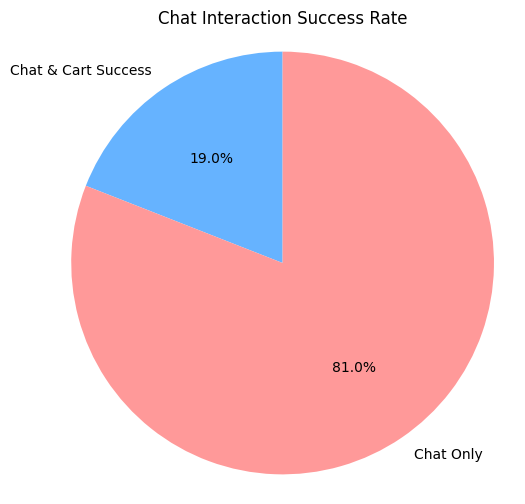

In [ ]:
# -----------------------------
# Function to check if chat interaction occurred in a session
# -----------------------------
def chat_interaction_flag(activity_log):
    if pd.isna(activity_log):
        return False
    return 'interacted with chat' in str(activity_log).lower()

# Apply function
df['ChatInteraction'] = df['ActivityLog'].apply(chat_interaction_flag)

# -----------------------------
# Success = chat interaction + added to cart
# -----------------------------
# Ensure 'AddToCart' column exists and is treated as boolean
if 'AddToCart' in df.columns:
    df['AddToCart'] = df['AddToCart'].astype(str).str.lower().isin(['true', '1', 'yes'])
else:
    df['AddToCart'] = False  # fallback if column missing

df['ChatSuccess'] = df['ChatInteraction'] & df['AddToCart']

# -----------------------------
# Aggregate counts
# -----------------------------
total_chat_sessions = df['ChatInteraction'].sum()
chat_success_sessions = df['ChatSuccess'].sum()

# Calculate percentage
chat_success_percentage = (chat_success_sessions / total_chat_sessions * 100) if total_chat_sessions > 0 else 0

# Create summary dataframe
chat_success_summary = pd.DataFrame({
    'Metric': ['Chat Interaction Success Rate'],
    'Percentage': [chat_success_percentage],
    'SuccessfulChatSessions': [chat_success_sessions],
    'TotalChatSessions': [total_chat_sessions]
})

print("Chat Interaction Success Summary:")
print(chat_success_summary)

# -----------------------------
# Visualization: Pie Chart
# -----------------------------
plt.figure(figsize=(6,6))
labels = ['Chat & Cart Success', 'Chat Only']
sizes = [chat_success_sessions, total_chat_sessions - chat_success_sessions]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Chat Interaction Success Rate')
plt.axis('equal')
plt.show()


Impact of Dietary Preference Count on Conversion Rate        

Conversion by Number of Dietary Preferences:
   NumDietaryPrefs  FractionConverted  UserCount  ConversionRate
0                0            0.39548        177       39.548023
1                1            0.90000         10       90.000000
2                2            1.00000          4      100.000000
3                3            0.87500          8       87.500000


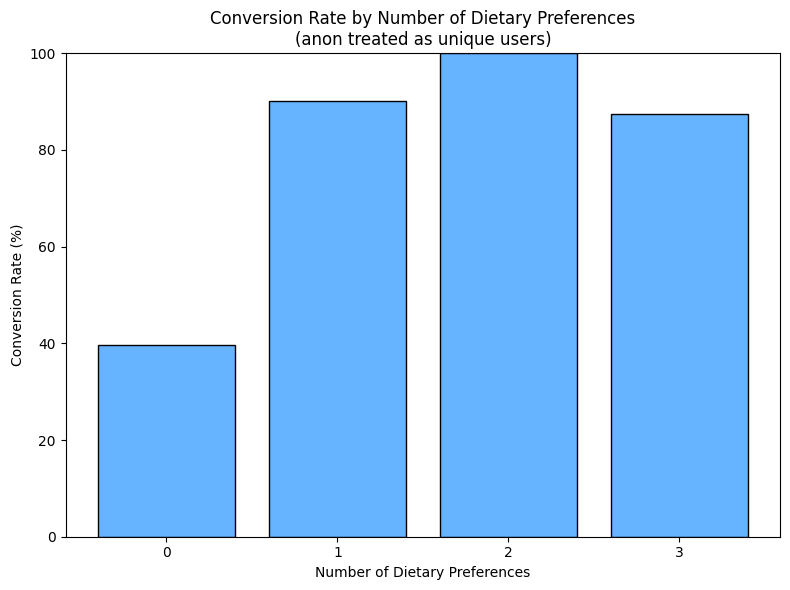

In [37]:

# -----------------------------
# Treat 'anon' sessions as unique users
# -----------------------------
df_unique = df.copy()
anon_mask = df_unique['UserID'].astype(str).str.lower() == 'anon'
df_unique.loc[anon_mask, 'UserID'] = [
    f"anon_{i}" for i in df_unique.loc[anon_mask].index
]

# -----------------------------
# Calculate number of dietary preferences per user
# -----------------------------
def count_dietary_prefs(prefs):
    if pd.isna(prefs) or prefs.strip() == '':
        return 0
    return len([p for p in prefs.split(';') if p.strip() != ''])

user_prefs = (
    df_unique.groupby('UserID', as_index=False)['DietaryPreferences']
    .first()
    .assign(NumDietaryPrefs=lambda x: x['DietaryPreferences'].apply(count_dietary_prefs))
)

# -----------------------------
# Determine per-user conversion (AddToCart OR RecipeSaved)
# -----------------------------
for col in ['AddToCart', 'RecipeSaved']:
    if col not in df_unique.columns:
        df_unique[col] = False  # fallback if missing
    else:
        df_unique[col] = df_unique[col].astype(str).str.lower().isin(['true', '1', 'yes'])

user_conversion = (
    df_unique.groupby('UserID', as_index=False)[['AddToCart', 'RecipeSaved']].max()
)
user_conversion['Converted'] = user_conversion['AddToCart'] | user_conversion['RecipeSaved']

# -----------------------------
# Merge preferences and conversion data
# -----------------------------
user_df = pd.merge(
    user_prefs[['UserID', 'NumDietaryPrefs']],
    user_conversion[['UserID', 'Converted']],
    on='UserID',
    how='left'
)

# -----------------------------
# Conversion rate by # of dietary preferences
# -----------------------------
conversion_by_prefs = (
    user_df.groupby('NumDietaryPrefs', as_index=False)
    .agg(FractionConverted=('Converted', 'mean'),
         UserCount=('UserID', 'count'))
)
conversion_by_prefs['ConversionRate'] = conversion_by_prefs['FractionConverted'] * 100

print("Conversion by Number of Dietary Preferences:")
print(conversion_by_prefs)


# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(8,6))
plt.bar(
    conversion_by_prefs['NumDietaryPrefs'].astype(str),
    conversion_by_prefs['ConversionRate'],
    color='#66b3ff',
    edgecolor='black'
)
plt.xlabel('Number of Dietary Preferences')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Number of Dietary Preferences\n(anon treated as unique users)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Effectiveness of Initial Recipe Engagement (First Click Efficiency)        

✅ First Click Efficiency (FCE): 5.60%
                   Status  UserCount  Percentage
0  First Click Successful         28         5.6
1          Not Successful        472        94.4


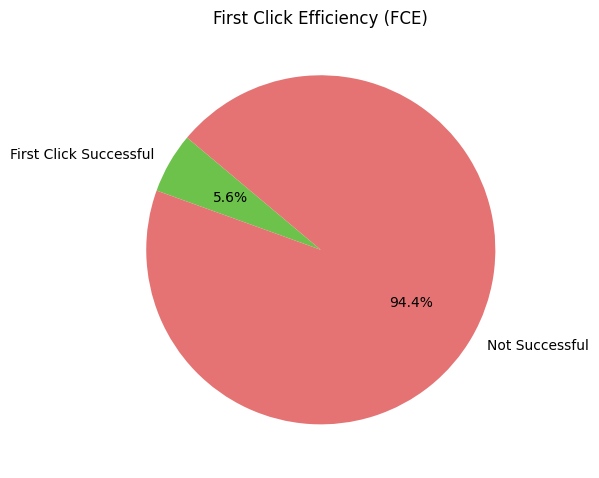

In [38]:
# -----------------------------
# Helper: extract first viewed recipe
# -----------------------------
def extract_first_viewed_recipe(activity_log):
    if pd.isna(activity_log):
        return None
    match = re.search(r"Viewed recipes: \['([^']+)'\]", str(activity_log))
    if match:
        return match.group(1)
    match2 = re.search(r"Viewed recipes before widget: \['([^']+)'\]", str(activity_log))
    if match2:
        return match2.group(1)
    return None

# -----------------------------
# Check if first viewed recipe was later saved or added to cart
# -----------------------------
def check_first_click_success(activity_log):
    if pd.isna(activity_log):
        return False
    first_view = extract_first_viewed_recipe(activity_log)
    if not first_view:
        return False

    added_to_cart = re.findall(r"Added to cart: \['([^']+)'\]", str(activity_log))
    saved_recipe = re.findall(r"Saved recipe: \['([^']+)'\]", str(activity_log))
    return first_view in added_to_cart or first_view in saved_recipe

# -----------------------------
# Apply logic
# -----------------------------
df['FirstClickSuccess'] = df['ActivityLog'].apply(check_first_click_success)

# -----------------------------
# Calculate metrics
# -----------------------------
success_count = df['FirstClickSuccess'].sum()
not_success_count = len(df) - success_count

fce_summary = pd.DataFrame({
    'Status': ['First Click Successful', 'Not Successful'],
    'UserCount': [success_count, not_success_count],
    'Percentage': [
        round((success_count / len(df)) * 100, 2) if len(df) > 0 else 0,
        round((not_success_count / len(df)) * 100, 2) if len(df) > 0 else 0
    ]
})

print(f"First Click Efficiency (FCE): {fce_summary.loc[0,'Percentage']:.2f}%")
print(fce_summary)

# -----------------------------
# Visualization: Pie chart
# -----------------------------
plt.figure(figsize=(6, 6))
plt.pie(
    fce_summary['UserCount'],
    labels=fce_summary['Status'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#6CC24A', '#E57373']
)
plt.title('First Click Efficiency (FCE)')
plt.tight_layout()
plt.show()


First Session Conversion Rate        

✅ First Session Conversion Rate: 16.33%
                          Metric  Conversion Rate (%)  Total Registered Users  \
0  First Session Conversion Rate                16.33                      49   

   Converted Users  Not Converted  
0                8             41  


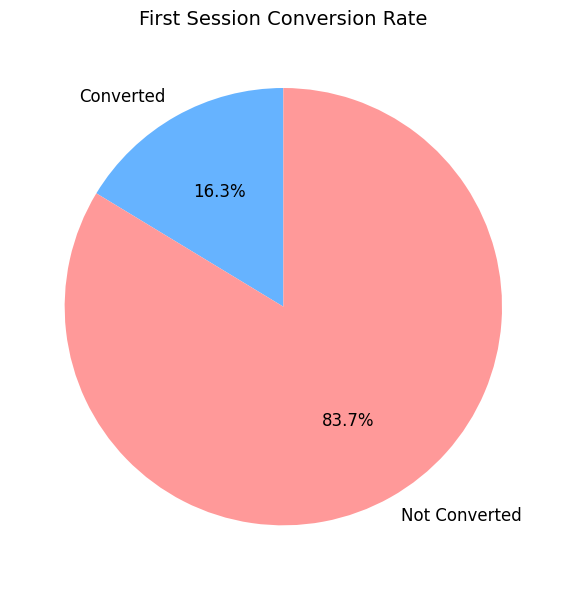

In [39]:
# --- Filter out anonymous users ---
df_registered = df[~df['UserID'].str.contains('anon', case=False, na=False)].copy()

# --- Convert SessionStart safely ---
df_registered['SessionStart'] = pd.to_datetime(
    df_registered['SessionStart'],
    errors='coerce'
)

# --- Sort by user and session start ---
df_registered = df_registered.sort_values(by=['UserID', 'SessionStart'])

# --- Select each user's first session ---
first_sessions = df_registered.groupby('UserID').first().reset_index()

# --- Determine conversion (AddToCart == TRUE) ---
first_sessions['Converted'] = first_sessions['AddToCart'].apply(
    lambda x: str(x).strip().lower() == 'true'
)

# --- Calculate metrics ---
total_users = first_sessions['UserID'].nunique()
converted_users = first_sessions[first_sessions['Converted']]['UserID'].nunique()
conversion_rate = (converted_users / total_users) * 100 if total_users > 0 else 0

# --- Create summary dataframe ---
conversion_summary = pd.DataFrame({
    'Metric': ['First Session Conversion Rate'],
    'Conversion Rate (%)': [round(conversion_rate, 2)],
    'Total Registered Users': [total_users],
    'Converted Users': [converted_users],
    'Not Converted': [total_users - converted_users]
})

print(f"First Session Conversion Rate: {conversion_rate:.2f}%")
print(conversion_summary)

# --- Visualization: Pie Chart ---
labels = ['Converted', 'Not Converted']
values = [converted_users, total_users - converted_users]

plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12},
    colors=['#66b3ff', '#ff9999']
)
plt.title('First Session Conversion Rate', fontsize=14)
plt.tight_layout()
plt.show()


Interaction Intensity vs Session Duration        

/tmp/ipython-input-2487608673.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sessionend'] = pd.to_datetime(df['sessionend'], errors='coerce')


✅ Average Interaction Score per session: 0.08


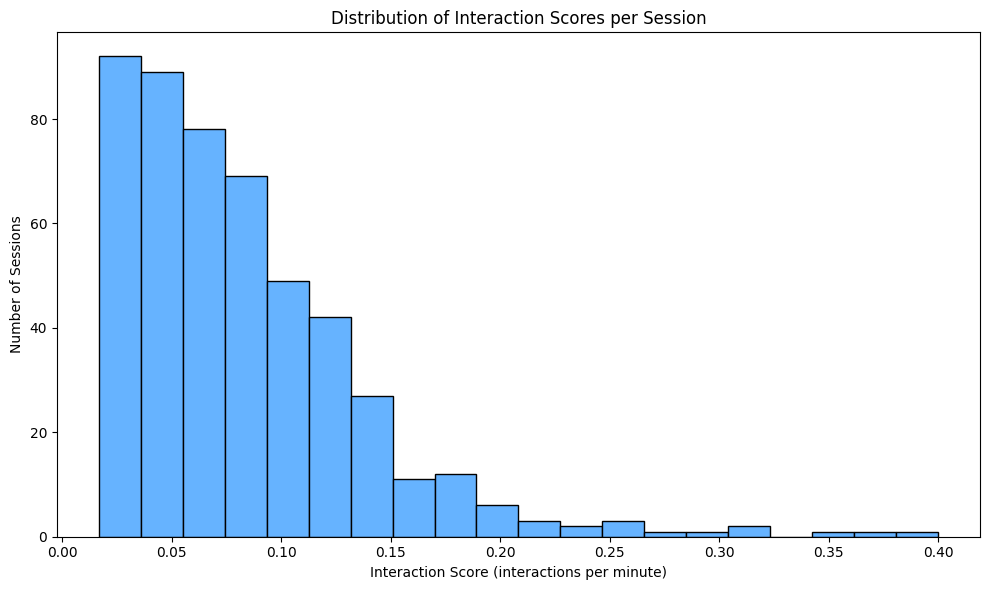

In [40]:
# --- Normalize column names ---
df.columns = df.columns.str.strip().str.lower()

# --- Ensure session duration exists ---
df['sessionstart'] = pd.to_datetime(df['sessionstart'], errors='coerce')
df['sessionend'] = pd.to_datetime(df['sessionend'], errors='coerce')
df['session_duration_min'] = (df['sessionend'] - df['sessionstart']).dt.total_seconds() / 60
df = df[df['session_duration_min'] > 0]  # Remove non-positive durations

# --- Parse ActivityLog for extra interactions ---
def count_activitylog_interactions(log):
    if pd.isna(log):
        return 0
    log = str(log).lower()
    count = 0
    actions = ['widget opened', 'interacted with chat', 'viewed recipes', 'searched for recipes']
    for action in actions:
        if action in log:
            count += 1
    return count

df['activitylog_count'] = df['activitylog'].apply(count_activitylog_interactions)

# --- Count other key interactions safely ---
def bool_to_int(x):
    if pd.isna(x):
        return 0
    if str(x).strip().lower() in ['true', '1']:
        return 1
    return 0

df['addtocart_count'] = df['addtocart'].apply(bool_to_int)
df['recipesaved_count'] = df['recipesaved'].apply(bool_to_int)
df['tabchange_count'] = df['tabchange'].apply(bool_to_int)

# --- Total key interactions per session ---
df['total_interactions'] = (
    df['activitylog_count'] +
    df['addtocart_count'] +
    df['recipesaved_count'] +
    df['tabchange_count']
)

# --- Interaction Score per session ---
df['interaction_score'] = df['total_interactions'] / df['session_duration_min']

# === Summary ===
avg_score = df['interaction_score'].mean()
print(f"Average Interaction Score per session: {avg_score:.2f}")

# === Visualization: Histogram of Interaction Scores ===
plt.figure(figsize=(10, 6))
plt.hist(df['interaction_score'], bins=20, edgecolor='black', color="#66b3ff")
plt.title("Distribution of Interaction Scores per Session")
plt.xlabel("Interaction Score (interactions per minute)")
plt.ylabel("Number of Sessions")
plt.tight_layout()
plt.show()


User Return Interval        

✅ Overall Average Gap Between Sessions: 158.16 minutes


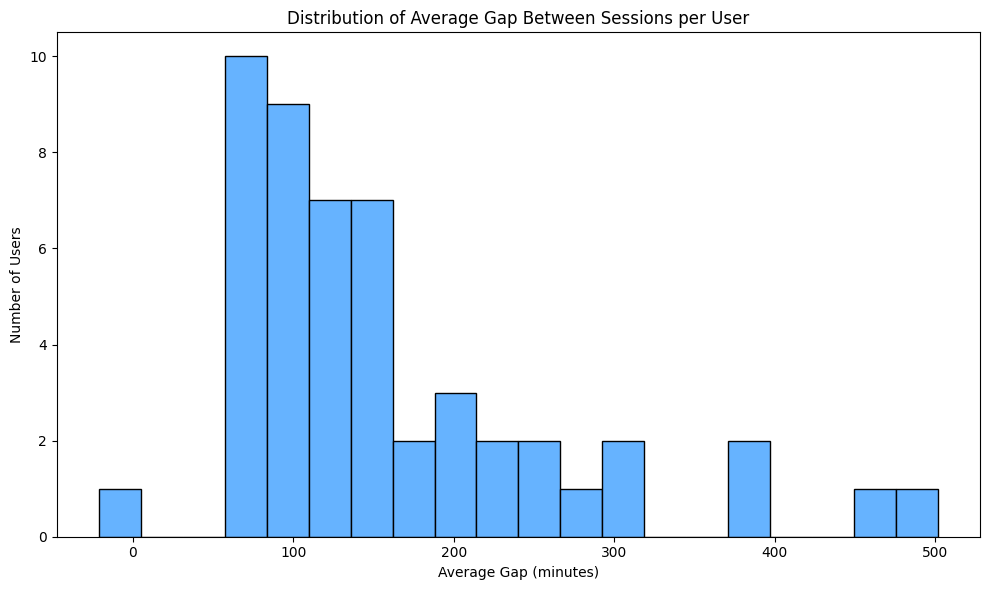

In [41]:
df.columns = df.columns.str.strip().str.lower()

# --- Ensure SessionStart and SessionEnd are datetime ---
df['sessionstart'] = pd.to_datetime(df['sessionstart'], errors='coerce')
df['sessionend'] = pd.to_datetime(df['sessionend'], errors='coerce')

# --- Remove rows with invalid dates ---
df = df.dropna(subset=['sessionstart', 'sessionend'])

# --- Sort by UserID and SessionStart ---
df = df.sort_values(['userid', 'sessionstart'])

# --- Calculate gaps between consecutive sessions per user ---
df['previous_session_end'] = df.groupby('userid')['sessionend'].shift(1)
df['gap_minutes'] = (df['sessionstart'] - df['previous_session_end']).dt.total_seconds() / 60

# --- Average gap per user (for visualization) ---
avg_gap_per_user = df.groupby('userid')['gap_minutes'].mean().reset_index()
avg_gap_per_user.rename(columns={'gap_minutes': 'avg_gap_minutes'}, inplace=True)

# --- Overall average gap for info ---
overall_avg_gap = avg_gap_per_user['avg_gap_minutes'].mean()
print(f"Overall Average Gap Between Sessions: {overall_avg_gap:.2f} minutes")

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.hist(avg_gap_per_user['avg_gap_minutes'].dropna(), bins=20, edgecolor='black', color="#66b3ff")
plt.title("Distribution of Average Gap Between Sessions per User")
plt.xlabel("Average Gap (minutes)")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


Cross-Device User Distribution Analysis        

Cross-Device Users: 48 / 50 (96.00%)


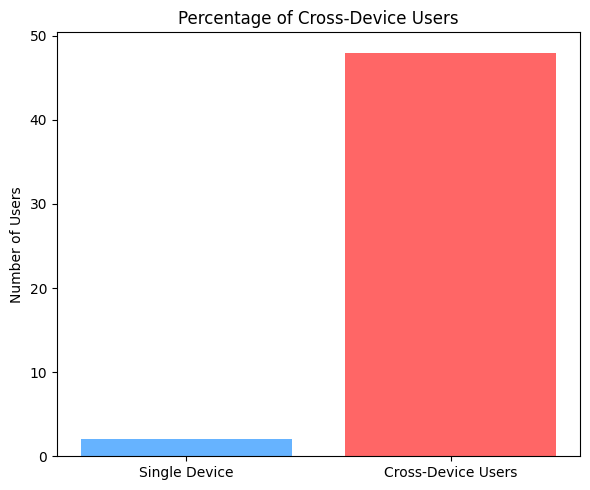

In [42]:
df.columns = df.columns.str.strip().str.lower()

# --- Ensure columns exist ---
if 'userid' not in df.columns or 'device' not in df.columns:
    raise ValueError("Columns 'UserID' and 'Device' must exist in the dataset.")

# --- Count unique devices per user ---
device_count_per_user = df.groupby('userid')['device'].nunique().reset_index()
device_count_per_user.rename(columns={'device': 'unique_devices'}, inplace=True)

# --- Identify cross-device users (more than 1 device) ---
device_count_per_user['cross_device_user'] = device_count_per_user['unique_devices'].apply(lambda x: 1 if x > 1 else 0)

# --- Calculate counts for visualization ---
single_device_count = (device_count_per_user['cross_device_user'] == 0).sum()
cross_device_count = (device_count_per_user['cross_device_user'] == 1).sum()

# --- Summary printout ---
total_users = len(device_count_per_user)
cross_device_percentage = (cross_device_count / total_users) * 100 if total_users > 0 else 0
print(f"Cross-Device Users: {cross_device_count} / {total_users} ({cross_device_percentage:.2f}%)")

# --- Visualization ---
plt.figure(figsize=(6, 5))
plt.bar(['Single Device', 'Cross-Device Users'],
        [single_device_count, cross_device_count],
        color=['#66b3ff', '#ff6666'])
plt.title("Percentage of Cross-Device Users")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


New Ingredient Adoption Rate       

Sessions with new ingredients: 386/500 (77.20%)


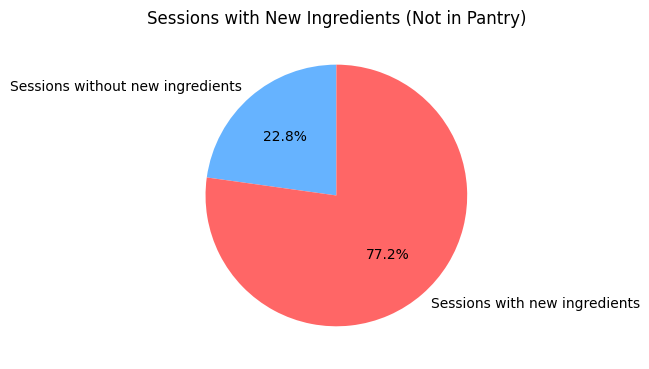

In [43]:
# --- Ensure necessary columns exist ---
if 'addedtocartitems' not in df.columns or 'pantry' not in df.columns:
    raise ValueError("Columns 'AddedToCartItems' and 'Pantry' must exist in the dataset.")

# --- Function to compute new ingredients in cart ---
def has_new_ingredients(cart_str, pantry_str):
    cart_set = set([i.strip() for i in str(cart_str).split(";") if i.strip() != ""])
    pantry_set = set([i.strip() for i in str(pantry_str).split(";") if i.strip() != ""])
    new_ingredients = cart_set - pantry_set
    return 1 if new_ingredients else 0  # 1 if at least one new ingredient, else 0

# --- Compute flag per session ---
df['new_ingredient_flag'] = df.apply(lambda x: has_new_ingredients(x['addedtocartitems'], x['pantry']), axis=1)

# --- Count sessions with and without new ingredients ---
no_new = (df['new_ingredient_flag'] == 0).sum()
with_new = (df['new_ingredient_flag'] == 1).sum()

total_sessions = no_new + with_new
percent_with_new = (with_new / total_sessions) * 100 if total_sessions > 0 else 0
print(f"Sessions with new ingredients: {with_new}/{total_sessions} ({percent_with_new:.2f}%)")

# --- Pie chart visualization ---
plt.figure(figsize=(6, 6))
plt.pie(
    [no_new, with_new],
    labels=['Sessions without new ingredients', 'Sessions with new ingredients'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff6666'],
    startangle=90
)
plt.title("Sessions with New Ingredients (Not in Pantry)")
plt.tight_layout()
plt.show()


Recipe View–to–Conversion Relationship        

Effect of Number of Recipes Viewed on Conversion:
   recipes_viewed_count  total_sessions  converted_sessions  conversion_rate
0                     0             256                  84         0.328125
1                     1             182                  62         0.340659
2                     2              34                  11         0.323529
3                     3              28                  10         0.357143


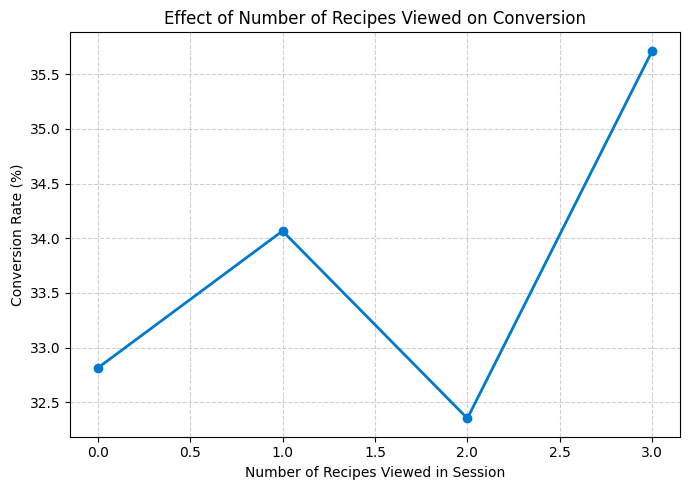

In [45]:
df = pd.read_csv("/content/merged_input.csv")
df.columns = df.columns.str.strip().str.lower()

# --- Ensure necessary columns exist ---
required_cols = ['userid', 'viewedrecipes', 'recipesaved', 'addtocart']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: '{col}' in dataset.")

# --- Helper functions ---
def count_recipes(viewed_str):
    """Count number of recipes viewed in a session"""
    if pd.isna(viewed_str) or str(viewed_str).strip() == "":
        return 0
    return len([x.strip() for x in str(viewed_str).split(";") if x.strip()])

def bool_to_int(val):
    """Convert boolean-like to 0/1"""
    if pd.isna(val):
        return 0
    val = str(val).strip().lower()
    if val in ['true', '1', 'yes']:
        return 1
    return 0

# --- Apply transformations ---
df['recipes_viewed_count'] = df['viewedrecipes'].apply(count_recipes)
df['saved_flag'] = df['recipesaved'].apply(bool_to_int)
df['carted_flag'] = df['addtocart'].apply(bool_to_int)

# --- Conversion flag (recipe saved or added to cart) ---
df['conversion_flag'] = df[['saved_flag', 'carted_flag']].max(axis=1)

# --- Group by number of recipes viewed ---
grouped = df.groupby('recipes_viewed_count', as_index=False).agg(
    total_sessions=('userid', 'count'),
    converted_sessions=('conversion_flag', 'sum')
)
grouped['conversion_rate'] = grouped['converted_sessions'] / grouped['total_sessions']
grouped = grouped.sort_values(by='recipes_viewed_count')

# --- Print key results ---
print("Effect of Number of Recipes Viewed on Conversion:")
print(grouped)

# --- Visualization ---
plt.figure(figsize=(7, 5))
plt.plot(
    grouped['recipes_viewed_count'],
    grouped['conversion_rate'] * 100,
    marker='o',
    linewidth=2,
    color='#007acc'
)
plt.title("Effect of Number of Recipes Viewed on Conversion")
plt.xlabel("Number of Recipes Viewed in Session")
plt.ylabel("Conversion Rate (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Effect of Widget Duration on Conversion        

✅ Conversion by Widget Duration (0.5s bins):
   duration_bin  sessions  conversions  conversion_rate
0           0.0       256           84           0.3281
1           1.0        11            4           0.3636
2           1.5        16            5           0.3125
3           2.0        13            8           0.6154
4           2.5        11            3           0.2727
5           3.0        10            3           0.3000
6           3.5        15            5           0.3333
7           4.0        17            5           0.2941
8           4.5        16            5           0.3125
9           5.0        12            2           0.1667


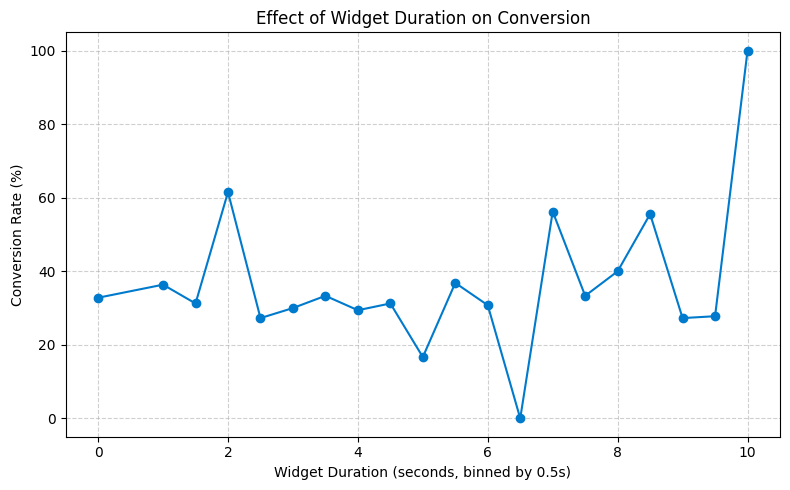

In [48]:
df.columns = df.columns.str.strip().str.lower()

# --- Ensure required columns exist ---
required_cols = ['userid', 'widgetduration', 'recipesaved', 'addtocart']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: '{col}' in dataset.")

# --- Helper function ---
def bool_to_int(val):
    if pd.isna(val):
        return 0
    if str(val).strip().lower() in ['true', '1', 'yes']:
        return 1
    return 0

# --- Convert conversion columns to numeric flags ---
df['recipesaved_flag'] = df['recipesaved'].apply(bool_to_int)
df['addtocart_flag'] = df['addtocart'].apply(bool_to_int)

# --- Total conversion flag per session ---
df['conversion_flag'] = ((df['recipesaved_flag'] + df['addtocart_flag']) > 0).astype(int)

# --- Handle widget duration ---
df['widgetduration'] = pd.to_numeric(df['widgetduration'], errors='coerce').fillna(0)

# --- Group into 0.5 second intervals ---
df['duration_bin'] = (np.floor(df['widgetduration'] / 0.5) * 0.5).astype(float)

# --- Compute conversion rate per bin ---
conversion_summary = df.groupby('duration_bin').agg(
    sessions=('userid', 'count'),
    conversions=('conversion_flag', 'sum')
).reset_index()
conversion_summary['conversion_rate'] = (
    conversion_summary['conversions'] / conversion_summary['sessions']
).round(4)

# --- Print summary ---
print("✅ Conversion by Widget Duration (0.5s bins):")
print(conversion_summary.head(10))

# --- Visualization ---
plt.figure(figsize=(8, 5))
plt.plot(conversion_summary['duration_bin'], conversion_summary['conversion_rate'] * 100, marker='o', color='#007acc')
plt.title("Effect of Widget Duration on Conversion")
plt.xlabel("Widget Duration (seconds, binned by 0.5s)")
plt.ylabel("Conversion Rate (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Search-to-Cart Efficiency Analysis        

Search-to-Cart Efficiency: 24.21% (23/95 search sessions resulted in cart)


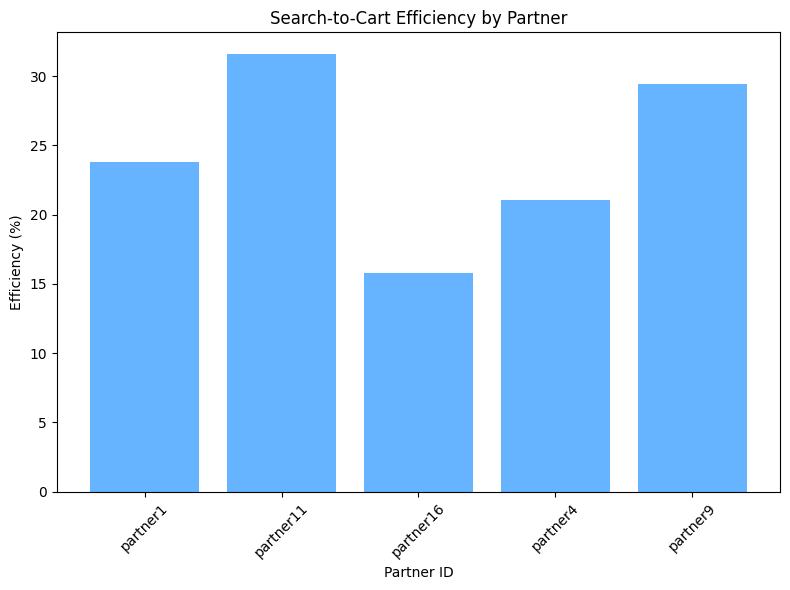

In [49]:
df.columns = df.columns.str.strip().str.lower()

# --- Check for required columns ---
required_cols = ['userid', 'recipesearch', 'addtocart']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: '{col}' in dataset.")

# --- Helper function to standardize boolean/flag columns ---
def to_bool(val):
    if pd.isna(val):
        return False
    val_str = str(val).strip().lower()
    return val_str in ['true', '1', 'yes', 'y']

# --- Apply conversion ---
df['recipesearch_flag'] = df['recipesearch'].apply(to_bool)
df['addtocart_flag'] = df['addtocart'].apply(to_bool)

# --- Calculate per-session metrics ---
df['search_to_cart'] = df.apply(
    lambda x: 1 if x['recipesearch_flag'] and x['addtocart_flag'] else 0, axis=1
)

# --- Compute overall metric ---
total_search_sessions = len(df[df['recipesearch_flag']])
search_and_cart_sessions = df['search_to_cart'].sum()
search_to_cart_efficiency = (search_and_cart_sessions / total_search_sessions * 100) if total_search_sessions > 0 else 0

print(f"Search-to-Cart Efficiency: {search_to_cart_efficiency:.2f}% "
      f"({search_and_cart_sessions}/{total_search_sessions} search sessions resulted in cart)")

# --- Partner-level breakdown (if PartnerID exists) ---
if 'partnerid' in df.columns:
    summary = df.groupby('partnerid').agg(
        total_sessions=('userid', 'count'),
        search_sessions=('recipesearch_flag', 'sum'),
        search_and_cart=('search_to_cart', 'sum')
    ).reset_index()
    summary['search_to_cart_efficiency_%'] = (
        summary['search_and_cart'] / summary['search_sessions'] * 100
    ).round(2)
else:
    summary = pd.DataFrame({
        'Metric': ['Search-to-Cart Efficiency (%)'],
        'Value': [round(search_to_cart_efficiency, 2)]
    })

# --- Visualization ---
plt.figure(figsize=(8,6))
if 'partnerid' in summary.columns:
    plt.bar(summary['partnerid'], summary['search_to_cart_efficiency_%'], color='#66b3ff')
    plt.title("Search-to-Cart Efficiency by Partner")
    plt.xlabel("Partner ID")
    plt.ylabel("Efficiency (%)")
    plt.xticks(rotation=45)
else:
    plt.bar(['Search-to-Cart Efficiency'], [search_to_cart_efficiency], color='#66b3ff')
    plt.ylabel("Efficiency (%)")
    plt.title("Overall Search-to-Cart Efficiency")

plt.tight_layout()
plt.show()


Zero-Interaction Session Analysis by Partner       

Overall Zero Interaction Rate: 34.40% (172/500 sessions)

Zero Interaction Sessions Summary (first 10 rows):
   partnerid  total_sessions  zero_sessions  active_sessions  \
0   partner1             109             40               69   
1  partner11             100             35               65   
2  partner16             105             34               71   
3   partner4              94             31               63   
4   partner9              92             32               60   

   zero_interaction_pct  
0                 36.70  
1                 35.00  
2                 32.38  
3                 32.98  
4                 34.78  


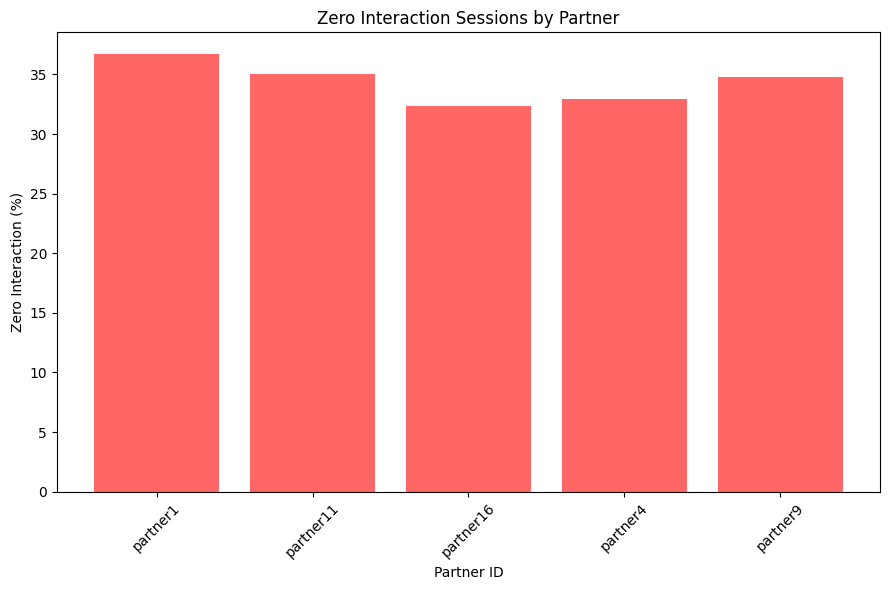

In [51]:
df.columns = df.columns.str.strip().str.lower()

# --- Check for required columns ---
required_cols = ['userid', 'partnerid', 'addtocart', 'recipesaved', 'addtopantryitems', 'viewedrecipes']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: '{col}' in dataset.")

# --- Helper functions ---
def bool_to_int(val):
    if pd.isna(val):
        return 0
    val_str = str(val).strip().lower()
    return 1 if val_str in ['true', '1', 'yes', 'y'] else 0

def has_value(val):
    """Return 1 if the value is non-empty and not NaN"""
    if pd.isna(val) or str(val).strip() == '':
        return 0
    return 1

# --- Convert engagement signals ---
df['addtocart_flag'] = df['addtocart'].apply(bool_to_int)
df['recipesaved_flag'] = df['recipesaved'].apply(bool_to_int)
df['addtopantry_flag'] = df['addtopantryitems'].apply(has_value)
df['viewedrecipes_flag'] = df['viewedrecipes'].apply(has_value)

# --- Identify zero interaction sessions ---
df['zero_interaction'] = (
    (df['addtocart_flag'] +
     df['recipesaved_flag'] +
     df['addtopantry_flag'] +
     df['viewedrecipes_flag']) == 0
).astype(int)

# --- Compute overall zero interaction rate ---
total_sessions = len(df)
zero_sessions = df['zero_interaction'].sum()
zero_interaction_rate = (zero_sessions / total_sessions * 100) if total_sessions > 0 else 0

print(f"Overall Zero Interaction Rate: {zero_interaction_rate:.2f}% "
      f"({zero_sessions}/{total_sessions} sessions)")

# --- Group-level summary (by PartnerID) ---
summary = df.groupby('partnerid').agg(
    total_sessions=('userid', 'count'),
    zero_sessions=('zero_interaction', 'sum')
).reset_index()

summary['active_sessions'] = summary['total_sessions'] - summary['zero_sessions']
summary['zero_interaction_pct'] = (summary['zero_sessions'] / summary['total_sessions'] * 100).round(2)

print("\nZero Interaction Sessions Summary (first 10 rows):")
print(summary.head(10))

# --- Visualization ---
plt.figure(figsize=(9,6))
plt.bar(summary['partnerid'], summary['zero_interaction_pct'], color='#ff6666', label='Zero Interaction %')
plt.title("Zero Interaction Sessions by Partner")
plt.xlabel("Partner ID")
plt.ylabel("Zero Interaction (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Device-Based Widget Engagement vs Conversion Rate        

/tmp/ipython-input-868587660.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df.groupby(group_cols).agg(


✅ Widget Engagement vs Conversion Summary:
    device widgetduration_bin  total_sessions  converted_sessions  \
0  Desktop               0-2s              97                  31   
1  Desktop               2-4s              17                   5   
2  Desktop               4-6s              21                   5   
3  Desktop               6-8s              17                   4   
4  Desktop              8-10s              20                   9   
5  Desktop             10-15s               0                   0   
6  Desktop             15-20s               0                   0   
7  Desktop             20-30s               0                   0   
8   Mobile               0-2s              93                  31   
9   Mobile               2-4s               9                   5   

   avg_widget_duration  conversion_rate  
0             0.166495        31.958763  
1             3.161765        29.411765  
2             4.987302        23.809524  
3             6.991176       

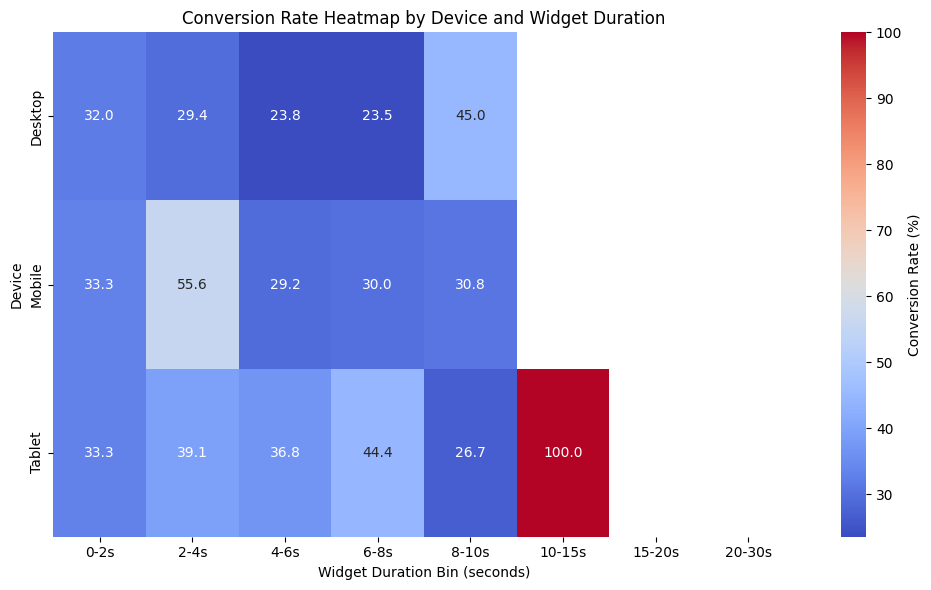

In [53]:
# Normalize headers
df.columns = df.columns.str.strip().str.lower()

# --------------------------
# Check for required columns
# --------------------------
required_cols = ['widgetduration', 'addtocart', 'recipesaved', 'device']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: '{col}' in dataset.")

# --------------------------
# Clean and preprocess
# --------------------------
df['widgetduration'] = pd.to_numeric(df['widgetduration'], errors='coerce').fillna(0)

# Define conversion
df['converted'] = (df['addtocart'] == True) | (df['recipesaved'] == True)

# --------------------------
# Create Widget Duration Bins
# --------------------------
bin_edges = [0, 2, 4, 6, 8, 10, 15, 20, 30]
bin_labels = ['0-2s', '2-4s', '4-6s', '6-8s', '8-10s', '10-15s', '15-20s', '20-30s']
df['widgetduration_bin'] = pd.cut(df['widgetduration'], bins=bin_edges, labels=bin_labels, right=False)

# --------------------------
# Calculate conversion metrics by Device and Widget Duration Bin
# --------------------------
group_cols = ['device', 'widgetduration_bin']
summary_df = df.groupby(group_cols).agg(
    total_sessions=('converted', 'count'),
    converted_sessions=('converted', 'sum'),
    avg_widget_duration=('widgetduration', 'mean')
).reset_index()

summary_df['conversion_rate'] = (summary_df['converted_sessions'] / summary_df['total_sessions']) * 100

print("Widget Engagement vs Conversion Summary:")
print(summary_df.head(10))


# --------------------------
# Visualization: Heatmap
# --------------------------
heatmap_df = summary_df.pivot(index='device', columns='widgetduration_bin', values='conversion_rate')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Conversion Rate (%)'})
plt.title('Conversion Rate Heatmap by Device and Widget Duration')
plt.xlabel('Widget Duration Bin (seconds)')
plt.ylabel('Device')
plt.tight_layout()
plt.show()


Partner–Device Conversion Impact       

Partner–Device Conversion Impact Summary:
   partnerid   device  total_sessions  converted_sessions  conversion_rate
0   partner1  Desktop              32                  12            37.50
1   partner1   Mobile              36                  14            38.89
2   partner1   Tablet              41                  12            29.27
3  partner11  Desktop              36                  12            33.33
4  partner11   Mobile              29                  14            48.28


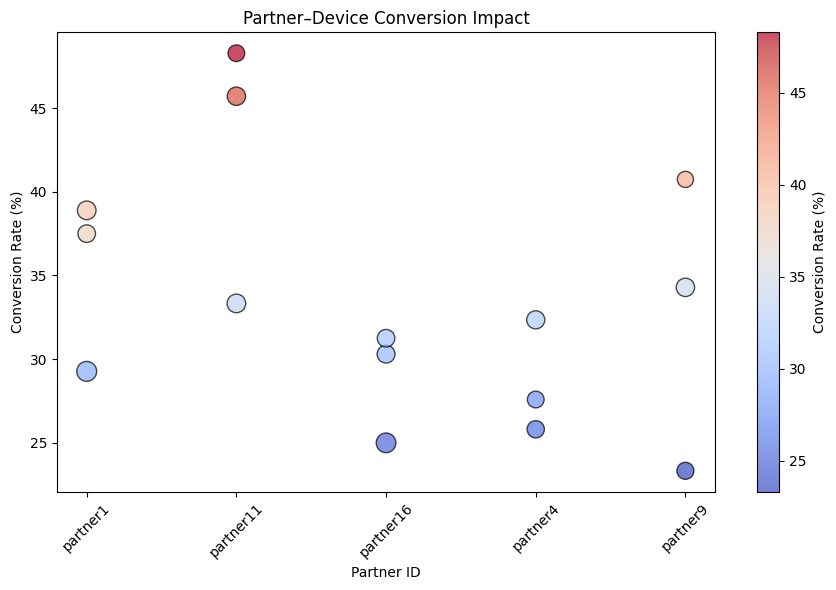

In [56]:
df.columns = df.columns.str.strip().str.lower()

# --- Helper function to convert to boolean flag ---
def to_flag(val):
    if pd.isna(val):
        return 0
    val_str = str(val).strip().lower()
    return 1 if val_str in ['true', '1', 'yes'] else 0

# --- Conversion Logic ---
df['addtocart_flag'] = df['addtocart'].apply(to_flag)
df['recipesaved_flag'] = df['recipesaved'].apply(to_flag)
df['converted'] = ((df['addtocart_flag'] + df['recipesaved_flag']) > 0).astype(int)

# --- Validate required columns ---
required_cols = ['partnerid', 'device']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# --- Group by PartnerID and Device ---
summary_df = df.groupby(['partnerid', 'device']).agg(
    total_sessions=('userid', 'count'),
    converted_sessions=('converted', 'sum')
).reset_index()

# --- Conversion rate ---
summary_df['conversion_rate'] = (summary_df['converted_sessions'] / summary_df['total_sessions'] * 100).round(2)

print("Partner–Device Conversion Impact Summary:")
print(summary_df.head())

# --- Visualization: Scatter Plot ---
plt.figure(figsize=(9,6))
plt.scatter(summary_df['partnerid'], summary_df['conversion_rate'],
            s=summary_df['total_sessions']*5,  # bubble size based on session count
            c=summary_df['conversion_rate'], cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.title("Partner–Device Conversion Impact")
plt.xlabel("Partner ID")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.colorbar(label='Conversion Rate (%)')
plt.tight_layout()
plt.show()

